# 🧭 Exploratory Data Analysis (EDA) — Electric Vehicle Dataset

## 🧩 Problem Statement — Electric Vehicle Market and Performance Analysis

### **Objective**

The electric vehicle (EV) industry is growing rapidly, with new models entering the market each year that vary in price, performance, and efficiency. Understanding how different specifications — such as **battery capacity**, **range**, **efficiency**, and **acceleration** — influence the **market price** can help both manufacturers and consumers make data-driven decisions.

This project aims to **analyze and interpret relationships between EV performance metrics and pricing**, identifying which factors most strongly affect an EV’s market value.

---

### **🎯 Target Feature**

- **Target Variable:** `Price (€)`  
  Represents the **market price** of each electric vehicle model.  
  It serves as the dependent variable in our analysis, reflecting the combined impact of performance, efficiency, brand, and design factors.

---

### **🔍 Predictor Features (Independent Variables)**

#### ⚡ **Performance and Efficiency**
- `Battery Capacity (kWh)` — Determines how much energy the EV can store; typically a major driver of price and range.  
- `Real-World Range (km)` — Indicates the actual driving distance on a full charge; influenced by battery size and efficiency.  
- `Energy Efficiency (Wh/km)` — Measures energy usage per km; lower values mean better efficiency.  
- `Acceleration (0-100 km/h, sec)` — Represents performance; sports EVs generally have faster acceleration.  
- `Fast Charging Speed (kW)` — Reflects how quickly a vehicle can recharge; a key technological feature.

#### 🧰 **Design and Utility**
- `Vehicle Weight (kg)` — Affects energy consumption and handling.  
- `Towing Capacity (kg)` — Indicates power and structure robustness.  
- `Cargo Volume (L)` — Adds to vehicle practicality and consumer appeal.

#### 🏢 **Brand and Market Attributes**
- `Brand` — Brand reputation and innovation influence EV value.  
- `Vehicle Status` — Whether a model is **Available** or **Discontinued**, showing market evolution.  
- `Availability Start Year` / `Availability End Year` — Capture model age and production cycle.

---

### **🧠 Problem Definition**
> To analyze and predict **electric vehicle pricing** using performance, efficiency, and brand-based features, and uncover the key factors that most influence EV market value.

---

### **🔬 Analytical Approach**
- Perform **Exploratory Data Analysis (EDA)** to understand feature distributions and correlations.  
- Compare **brand-level and performance-based insights**.  
- Visualize **relationships between numerical and categorical variables**.  


## 🧩 Step 1 — Import Required Libraries

#### Before starting EDA, import all essential Python libraries for data analysis and visualization.

In [5]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'



import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from datetime import datetime
import missingno as msno

import warnings
warnings.filterwarnings('ignore')


plt.style.use('bmh')
sns.set(style="whitegrid", palette="coolwarm")

## 📂 Step 2 — Load and Inspect the Dataset

#### Let’s load the cleaned dataset (EV_Data_Cleaned.csv) from the web scraping phase and check its structure.

In [6]:
# Load dataset
df = pd.read_csv(r"D:\eda\EV_Data_Cleaned.csv")

# Overview
print("✅ Dataset Loaded Successfully")
print("Shape:", df.shape)
df.head()


✅ Dataset Loaded Successfully
Shape: (977, 15)


,Brand,Model Name,Vehicle Status,Year,Availability Start Year,Availability End Year,Real-World Range (km),Energy Efficiency (Wh/km),Battery Capacity (kWh),Vehicle Weight (kg),"Acceleration (0-100 km/h, sec)",Fast Charging Speed (kW),Towing Capacity (kg),Cargo Volume (L),Price (€)
0,MG,MG4 Electric 64 kWhMG MG4 Electric 64 kWh,Available,2022,2022,NaN,360.0,171.0,61.7,1720.0,7.9,115.0,500.0,363.0,36589.0
1,BMW,iX3 50 xDrive (MY26)BMW iX3 50 xDrive,Available,2025,2025,NaN,610.0,178.0,108.7,2360.0,4.9,225.0,2000.0,578.0,68989.0
2,Tesla,Model Y Long Range AWD (Juniper)Tesla Model Y ...,Discontinued,2025,2025,2025.0,455.0,165.0,75.0,2070.0,4.8,124.0,1600.0,971.0,55589.0
3,Mercedes-Benz,CLA 250+Mercedes-Benz CLA 250+,Available,2025,2025,NaN,585.0,145.0,85.0,2050.0,6.7,235.0,1500.0,506.0,55789.0
4,BMW,iX xDrive40BMW iX xDrive40,Discontinued,2021,2021,2025.0,360.0,197.0,71.0,2440.0,6.1,102.0,2500.0,500.0,80889.0


### 🚗 Final Dataset — Column Descriptions

| **Column Name**                    | **Description**                                                                                              |
| ---------------------------------- | --------------------------------------------------------------------------------------------------------------------------------- |
| **Brand**                          | The car manufacturer or brand name (e.g., BMW, Tesla, Kia).                                                                       |
| **Model Name**                     | The specific model and variant name of the vehicle. Sometimes includes battery or drive details (e.g., “Model 3 Long Range RWD”). |
| **Vehicle Status**                 | Indicates whether the vehicle is **Available**, **Upcoming**, or **Discontinued**.                                                |
| **Year**                           | The model year or main release year for the vehicle.                                                                              |
| **Availability Start Year**        | The year when the model became available for sale or order.                                                                       |
| **Availability End Year**          | The year when the model was discontinued (if applicable). Empty (NaN) means it’s still available.                                 |
| **Real-World Range (km)**          | The practical driving range of the car (in kilometers) based on real-world tests, not ideal lab results.                          |
| **Energy Efficiency (Wh/km)**      | How much energy the car uses per kilometer, in **watt-hours per kilometer**. Lower is better (more efficient).                    |
| **Battery Capacity (kWh)**         | The size of the battery pack, measured in **kilowatt-hours (kWh)** — higher capacity means longer range.                          |
| **Vehicle Weight (kg)**            | The total weight of the car (in kilograms).                                                                                       |
| **Acceleration (0-100 km/h, sec)** | How many seconds it takes the car to accelerate from **0 to 100 km/h** — lower values mean faster acceleration.                   |
| **Fast Charging Speed (kW)**       | The maximum rate at which the car can charge using a DC fast charger (in **kilowatts**).                                          |
| **Towing Capacity (kg)**           | The maximum weight the car can tow (in kilograms).                                                                                |
| **Cargo Volume (L)**               | The total available cargo or trunk space (in **liters**).                                                                         |
| **Price (€)**                      | The base or starting price of the vehicle, shown in **euros (€)**.                                                                |


## 🧾 Step 3 — Dataset Overview and Summary Statistics

#### Understand dataset structure: column data types, null values, and statistical summary of numerical and categorical features.

In [7]:
df.info()
print("\nMissing Values:\n", df.isna().sum())
df.describe(include='all').T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Brand                           977 non-null    object 
 1   Model Name                      977 non-null    object 
 2   Vehicle Status                  977 non-null    object 
 3   Year                            977 non-null    int64  
 4   Availability Start Year         977 non-null    int64  
 5   Availability End Year           447 non-null    float64
 6   Real-World Range (km)           977 non-null    float64
 7   Energy Efficiency (Wh/km)       977 non-null    float64
 8   Battery Capacity (kWh)          977 non-null    float64
 9   Vehicle Weight (kg)             977 non-null    float64
 10  Acceleration (0-100 km/h, sec)  977 non-null    float64
 11  Fast Charging Speed (kW)        977 non-null    float64
 12  Towing Capacity (kg)            924 

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Brand,977,74,Mercedes-Benz,78,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Model Name,977,977,MG4 Electric 64 kWhMG MG4 Electric 64 kWh,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vehicle Status,977,2,Available,530,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,977.0,NaN,NaN,NaN,2022.812692,2.341431,2011.0,2022.0,2023.0,2025.0,2026.0
Availability Start Year,977.0,NaN,NaN,NaN,2022.812692,2.341431,2011.0,2022.0,2023.0,2025.0,2026.0
Availability End Year,447.0,NaN,NaN,NaN,2022.948546,2.322543,2013.0,2022.0,2024.0,2025.0,2025.0
Real-World Range (km),977.0,NaN,NaN,NaN,375.762538,110.051482,85.0,305.0,385.0,455.0,720.0
Energy Efficiency (Wh/km),977.0,NaN,NaN,NaN,191.230297,28.855583,109.0,170.0,185.0,205.0,295.0
Battery Capacity (kWh),977.0,NaN,NaN,NaN,71.230194,21.069752,14.5,57.0,74.0,87.0,123.0
Vehicle Weight (kg),977.0,NaN,NaN,NaN,2096.202661,357.629966,1000.0,1870.0,2140.0,2340.0,3080.0


### 🧠 Observation:

- From this, we can identify which features are categorical, which are numerical, and where data cleaning or imputation may still be required.

## 🧹 Step 4 — Handle Missing Values

#### Missing values may exist in attributes such as Availability End Year, Towing Capacity (kg), or Cargo Volume (L).
We can impute or retain them depending on the meaning (e.g., if a car is “Available”, missing end year means it’s still in production).

In [8]:
# Check missing value %
missing = (df.isna().sum() / len(df)) * 100
print("Missing Values (%):\n", missing)

# Impute meaningful missing values
df.loc[(df["Vehicle Status"] == "Available") & (df["Availability End Year"].isna()), "Availability End Year"] = 2025

df["Towing Capacity (kg)"].fillna(df["Towing Capacity (kg)"].median(), inplace=True)
df["Cargo Volume (L)"].fillna(df["Cargo Volume (L)"].median(), inplace=True)

print("\n ======================= After handling Nulls ======================= \n")

df.isna().sum()

Missing Values (%):
 Brand                              0.000000
Model Name                         0.000000
Vehicle Status                     0.000000
Year                               0.000000
Availability Start Year            0.000000
Availability End Year             54.247697
Real-World Range (km)              0.000000
Energy Efficiency (Wh/km)          0.000000
Battery Capacity (kWh)             0.000000
Vehicle Weight (kg)                0.000000
Acceleration (0-100 km/h, sec)     0.000000
Fast Charging Speed (kW)           0.000000
Towing Capacity (kg)               5.424770
Cargo Volume (L)                   2.251791
Price (€)                          0.000000
dtype: float64

 ======================= After handling Nulls ======================= 



Brand                             0
Model Name                        0
Vehicle Status                    0
Year                              0
Availability Start Year           0
Availability End Year             0
Real-World Range (km)             0
Energy Efficiency (Wh/km)         0
Battery Capacity (kWh)            0
Vehicle Weight (kg)               0
Acceleration (0-100 km/h, sec)    0
Fast Charging Speed (kW)          0
Towing Capacity (kg)              0
Cargo Volume (L)                  0
Price (€)                         0
dtype: int64

# 🧩 Step — Define a Save Path

In [9]:
import os

# Define your save directory
save_path = r"D:\eda\images"

# Create folder if it doesn't exist
os.makedirs(save_path, exist_ok=True)


# 🔍 Part 1 — Univariate Analysis

## 📊 Step 5 — Categorical Features

#### 🎯 Objective: Univariate Analysis (Brand Distribution)

The objective of this step is to understand the **distribution of EV models across different brands** and identify the **dominant players** in the market.  
By analyzing brand frequency and market share, we can uncover:
- Which brands contribute the most to the EV lineup  
- The degree of **market concentration** vs **diversification**  
- How established automakers compare to emerging EV manufacturers  

We use **bar plots** and **pie charts** to visualize brand share, helping to highlight the **competitive structure** and **market fragmentation** in the EV industry.


<Figure size 1200x700 with 0 Axes>

<Axes: xlabel='Count', ylabel='Brand'>

Text(83, 0, '78 (7.98%)')

Text(74, 1, '69 (7.06%)')

Text(68, 2, '63 (6.45%)')

Text(49, 3, '44 (4.5%)')

Text(49, 4, '44 (4.5%)')

Text(47, 5, '42 (4.3%)')

Text(46, 6, '41 (4.2%)')

Text(43, 7, '38 (3.89%)')

Text(43, 8, '38 (3.89%)')

Text(42, 9, '37 (3.79%)')

Text(34, 10, '29 (2.97%)')

Text(33, 11, '28 (2.87%)')

Text(33, 12, '28 (2.87%)')

Text(29, 13, '24 (2.46%)')

Text(29, 14, '24 (2.46%)')

Text(355, 15, '350 (35.82%)')

Text(0.5, 1.0, 'Top 15 EV Brands + Others (Distribution)')

Text(0.5, 0, 'Number of Models')

Text(0, 0.5, 'Brand')

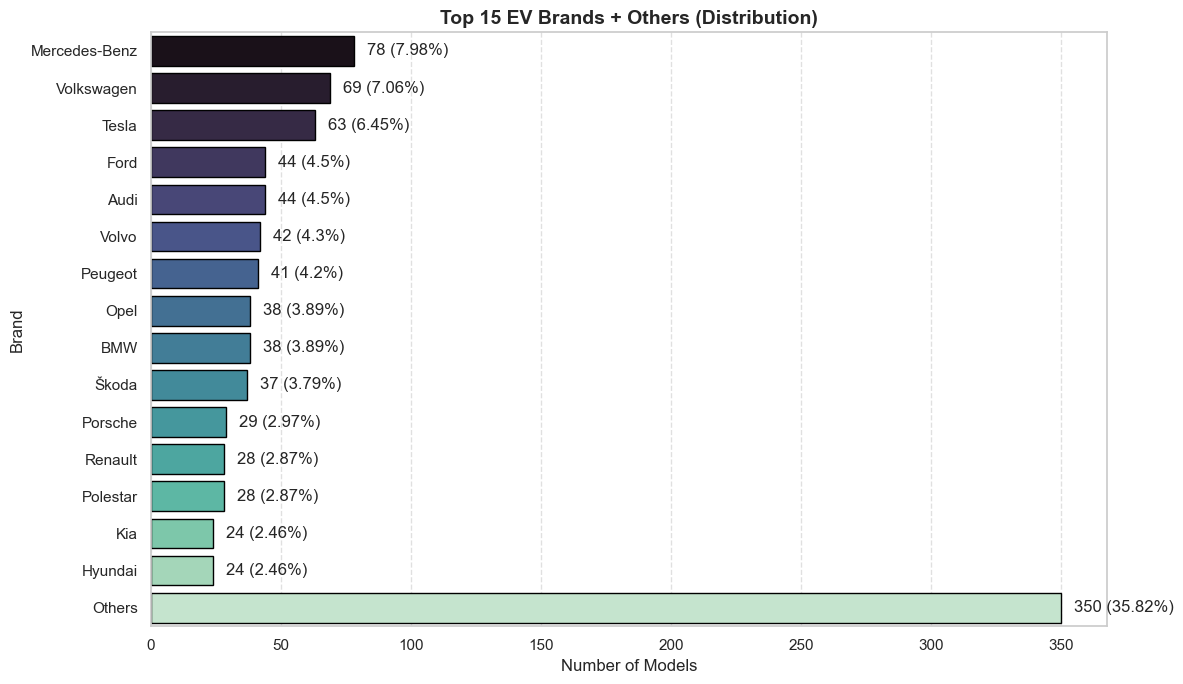

Top 3 Brands by EV count:


,Brand,Count,Percentage
0,Mercedes-Benz,78,7.98
1,Volkswagen,69,7.06
2,Tesla,63,6.45


In [10]:
# Step 5 — Univariate Analysis: Brand Distribution (Top 15 + Others)

brand_counts = df['Brand'].value_counts()
top_n = 15

# Combine top N and 'Others'
top_brands = brand_counts.head(top_n)
others_sum = brand_counts[top_n:].sum()
top_brands['Others'] = others_sum

# Convert to DataFrame for easier plotting
brand_df = top_brands.reset_index()
brand_df.columns = ['Brand', 'Count']
brand_df['Percentage'] = (brand_df['Count'] / df['Brand'].shape[0] * 100).round(2)

plt.figure(figsize=(12,7))
sns.barplot(
    data=brand_df, 
    x='Count', 
    y='Brand', 
    palette='mako',
    edgecolor='black'
)

# Annotate counts and percentages on bars
for index, value in enumerate(brand_df['Count']):
    plt.text(value + 5, index, f"{value} ({brand_df['Percentage'][index]}%)", va='center')

plt.title('Top 15 EV Brands + Others (Distribution)', fontsize=14, fontweight='bold')
plt.xlabel('Number of Models', fontsize=12)
plt.ylabel('Brand', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.tight_layout()
plt.savefig(os.path.join(save_path, "step5_brand_distribution_barplot.png"), dpi=300, bbox_inches='tight')
plt.show();


# Observation
top_3 = brand_df.head(3)
print("Top 3 Brands by EV count:")
display(top_3)


<Figure size 800x800 with 0 Axes>

([<matplotlib.patches.Wedge at 0x130604a91c0>,
 [Text(-0.9917711161331949, 0.47580463764439795, 'Mercedes-Benz'),
  Text(-1.099646099002623, -0.027900841354951054, 'Volkswagen'),
  Text(-0.990578032160386, -0.47828355836392433, 'Tesla'),
  Text(-0.7711893721715585, -0.7843895411398839, 'Ford'),
  Text(-0.5215125887354669, -0.9685167111570311, 'Audi'),
  Text(-0.23726814211182806, -1.0741060602839934, 'Volvo'),
  Text(0.05440991094119002, -1.0986535220857265, 'Peugeot'),
  Text(0.32876109764010364, -1.0497219349325204, 'Opel'),
  Text(0.5729797562891127, -0.9389857287961673, 'BMW'),
  Text(0.7806607179424261, -0.7749637691283485, 'Škoda'),
  Text(0.9263819998736841, -0.5931411217493134, 'Porsche'),
  Text(1.018972135104287, -0.4143619044760399, 'Renault'),
  Text(1.0767082922330835, -0.22516494717543667, 'Polestar'),
  Text(1.0991659604585267, -0.04282746045803614, 'Kia'),
  Text(1.0926833683123753, 0.1266611882682392, 'Hyundai'),
  Text(0.27510412443263077, 1.0650435299649286, 'Others'

Text(0.5, 1.0, 'EV Market Share by Brand (Top 15 + Others)')

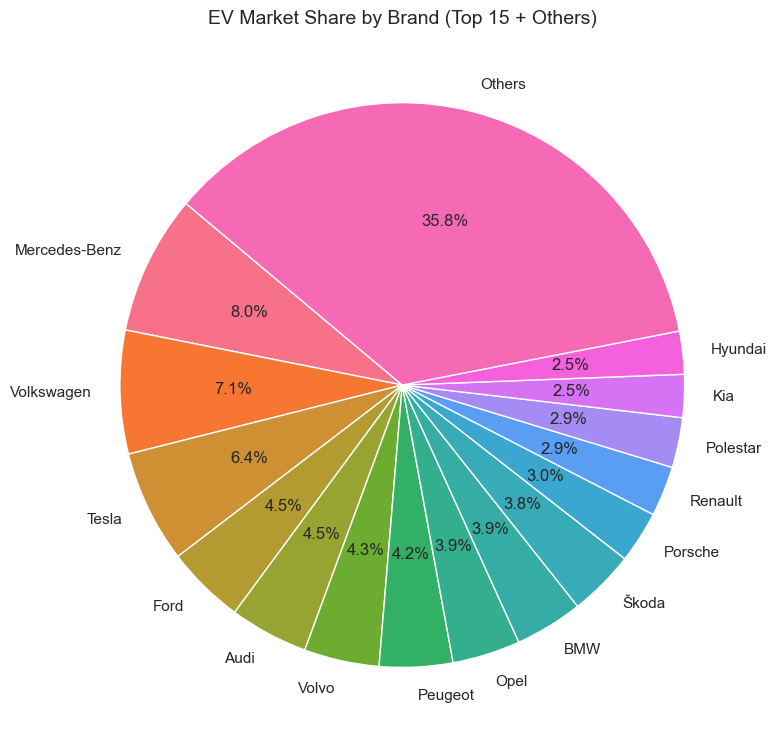

In [11]:
plt.figure(figsize=(8,8))
plt.pie(
    brand_df['Count'],
    labels=brand_df['Brand'],
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('husl', len(brand_df))
)
plt.title('EV Market Share by Brand (Top 15 + Others)', fontsize=14)
plt.tight_layout()
plt.savefig(os.path.join(save_path, "step5_brand_distribution_PieChart.png"), dpi=300, bbox_inches='tight')
plt.show()



## 📊 Brand Distribution Analysis — Key Insights (Brief)

- **Market Leaders:** Mercedes-Benz (8%), Volkswagen (7%), and Tesla (6.5%) lead the EV market — together contributing over **20% of total models**.  
- **Top 10 brands** capture ~50% of the market, showing moderate **concentration** among established automakers.  
- **European dominance:** Strong presence of German and French brands (Mercedes, VW, Audi, BMW, Peugeot, Renault, Citroën).  
- **Fragmented tail:** “Others” category forms ~36% of the market, reflecting **many small players** and ongoing diversification.  
- **Healthy competition:** No single brand monopolizes; traditional and new EV makers coexist actively.  

> **Summary:** The EV market is competitive, with established European leaders at the top and a long tail of emerging brands — a hallmark of an expanding and innovative industry.


## 📊 Step 6 — Univariate Numerical Analysis: Distribution, Outliers & Correlations

### 🎯 Objective
To understand how each **numerical feature** in the EV dataset is distributed, detect **outliers**, and examine **relationships** among the variables.  
We used:
- **Histograms with KDE (Kernel Density Estimation)** — to visualize data distribution and skewness.  
- **Boxplots** — to identify outliers using the IQR (Interquartile Range) method.  
- **Correlation Heatmap** — to analyze pairwise relationships between numerical features using the **Pearson correlation coefficient**.

📈 Found 12 numerical columns for analysis


<Figure size 1200x500 with 0 Axes>

<Axes: >

<Axes: xlabel='Year', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Year')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Frequency')

<Axes: >

<Axes: xlabel='Year'>

Text(0.5, 1.0, 'Boxplot of Year')

Text(0.5, 0, 'Year')

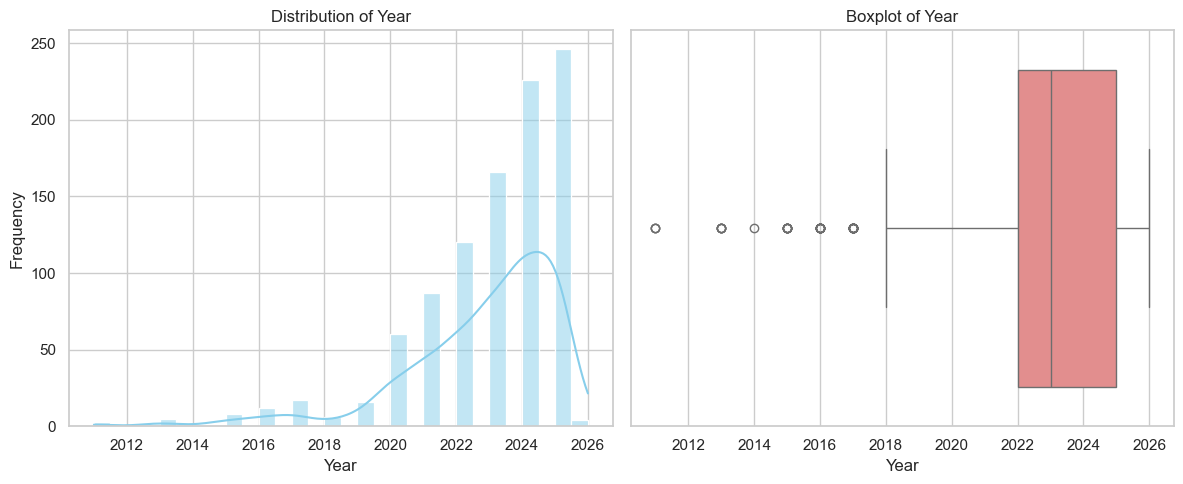

<Figure size 1200x500 with 0 Axes>

<Axes: >

<Axes: xlabel='Availability Start Year', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Availability Start Year')

Text(0.5, 0, 'Availability Start Year')

Text(0, 0.5, 'Frequency')

<Axes: >

<Axes: xlabel='Availability Start Year'>

Text(0.5, 1.0, 'Boxplot of Availability Start Year')

Text(0.5, 0, 'Availability Start Year')

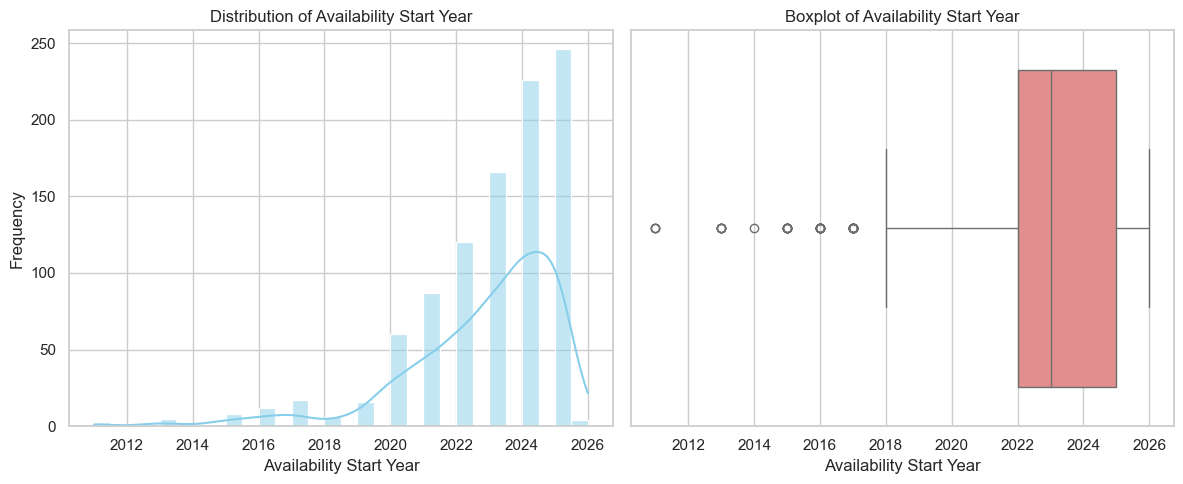

<Figure size 1200x500 with 0 Axes>

<Axes: >

<Axes: xlabel='Availability End Year', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Availability End Year')

Text(0.5, 0, 'Availability End Year')

Text(0, 0.5, 'Frequency')

<Axes: >

<Axes: xlabel='Availability End Year'>

Text(0.5, 1.0, 'Boxplot of Availability End Year')

Text(0.5, 0, 'Availability End Year')

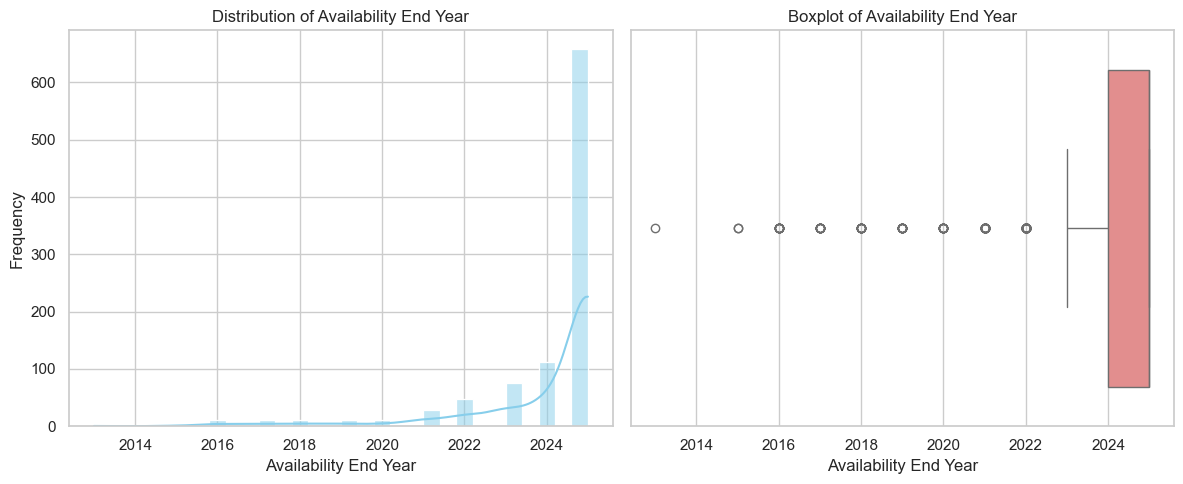

<Figure size 1200x500 with 0 Axes>

<Axes: >

<Axes: xlabel='Real-World Range (km)', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Real-World Range (km)')

Text(0.5, 0, 'Real-World Range (km)')

Text(0, 0.5, 'Frequency')

<Axes: >

<Axes: xlabel='Real-World Range (km)'>

Text(0.5, 1.0, 'Boxplot of Real-World Range (km)')

Text(0.5, 0, 'Real-World Range (km)')

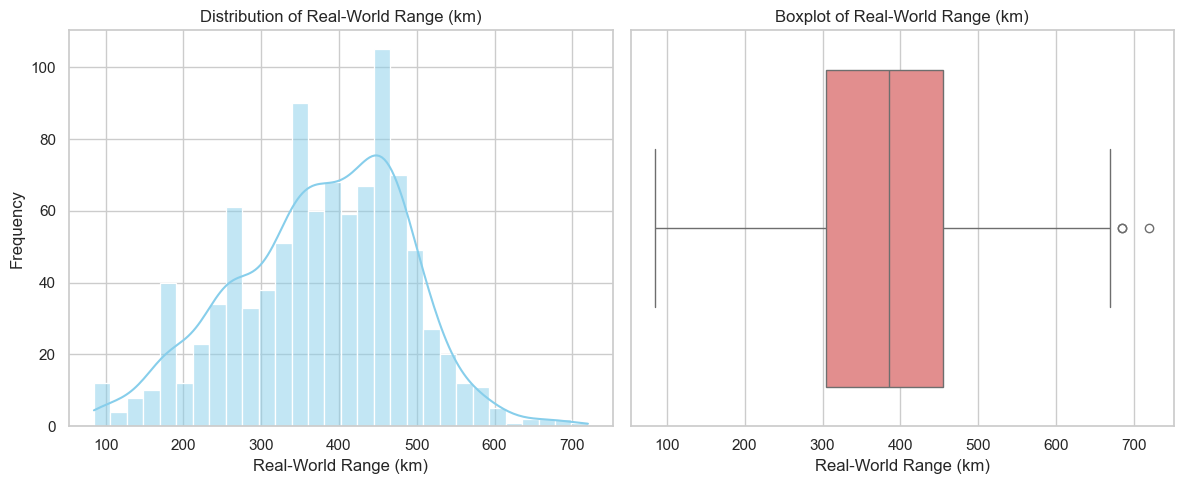

<Figure size 1200x500 with 0 Axes>

<Axes: >

<Axes: xlabel='Energy Efficiency (Wh/km)', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Energy Efficiency (Wh/km)')

Text(0.5, 0, 'Energy Efficiency (Wh/km)')

Text(0, 0.5, 'Frequency')

<Axes: >

<Axes: xlabel='Energy Efficiency (Wh/km)'>

Text(0.5, 1.0, 'Boxplot of Energy Efficiency (Wh/km)')

Text(0.5, 0, 'Energy Efficiency (Wh/km)')

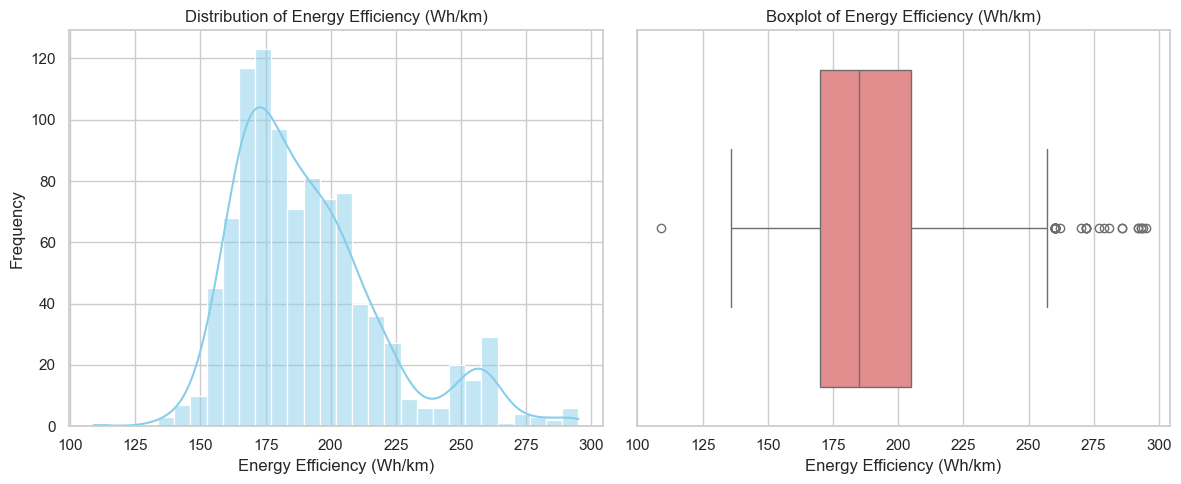

<Figure size 1200x500 with 0 Axes>

<Axes: >

<Axes: xlabel='Battery Capacity (kWh)', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Battery Capacity (kWh)')

Text(0.5, 0, 'Battery Capacity (kWh)')

Text(0, 0.5, 'Frequency')

<Axes: >

<Axes: xlabel='Battery Capacity (kWh)'>

Text(0.5, 1.0, 'Boxplot of Battery Capacity (kWh)')

Text(0.5, 0, 'Battery Capacity (kWh)')

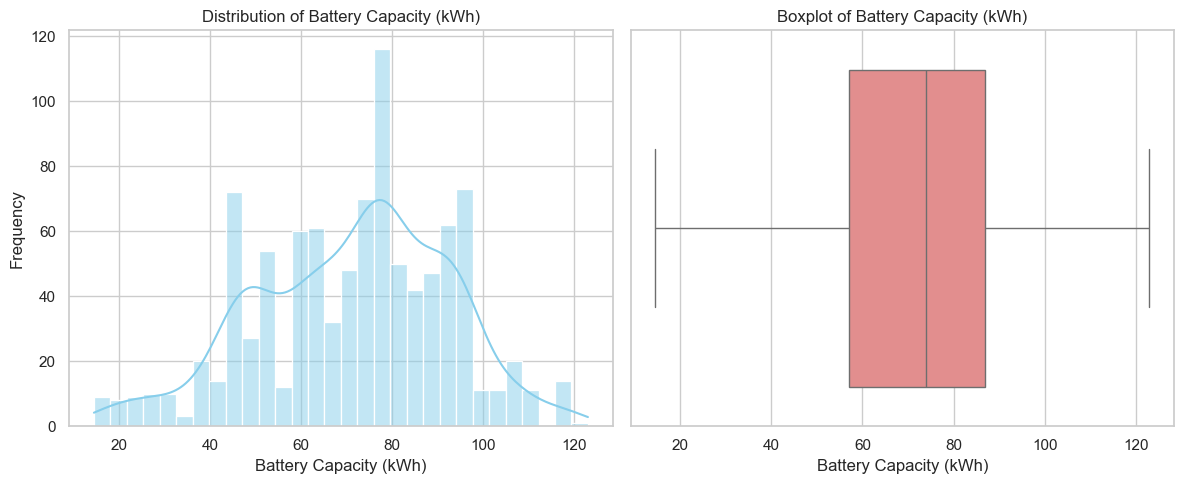

<Figure size 1200x500 with 0 Axes>

<Axes: >

<Axes: xlabel='Vehicle Weight (kg)', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Vehicle Weight (kg)')

Text(0.5, 0, 'Vehicle Weight (kg)')

Text(0, 0.5, 'Frequency')

<Axes: >

<Axes: xlabel='Vehicle Weight (kg)'>

Text(0.5, 1.0, 'Boxplot of Vehicle Weight (kg)')

Text(0.5, 0, 'Vehicle Weight (kg)')

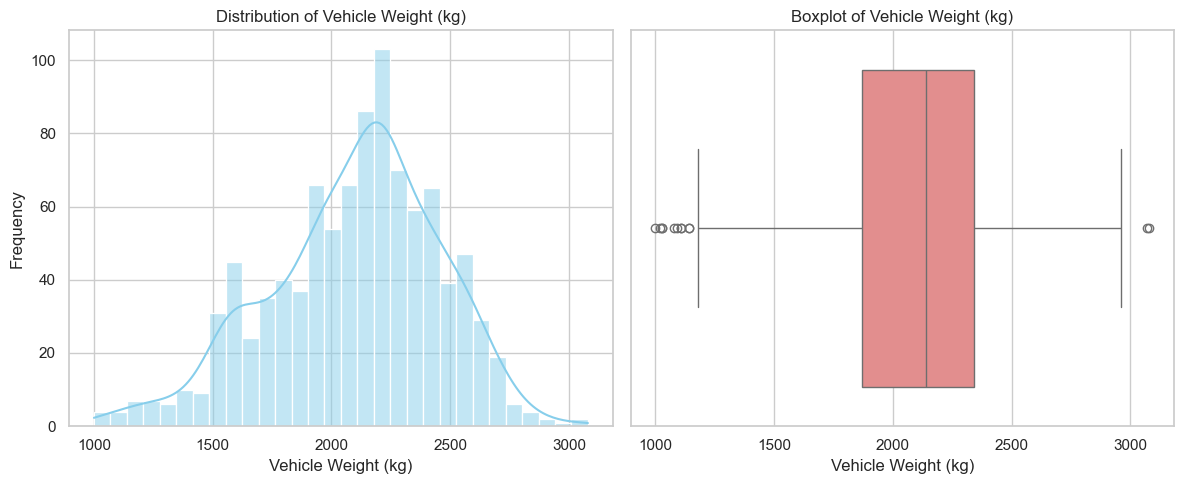

<Figure size 1200x500 with 0 Axes>

<Axes: >

<Axes: xlabel='Acceleration (0-100 km/h, sec)', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Acceleration (0-100 km/h, sec)')

Text(0.5, 0, 'Acceleration (0-100 km/h, sec)')

Text(0, 0.5, 'Frequency')

<Axes: >

<Axes: xlabel='Acceleration (0-100 km/h, sec)'>

Text(0.5, 1.0, 'Boxplot of Acceleration (0-100 km/h, sec)')

Text(0.5, 0, 'Acceleration (0-100 km/h, sec)')

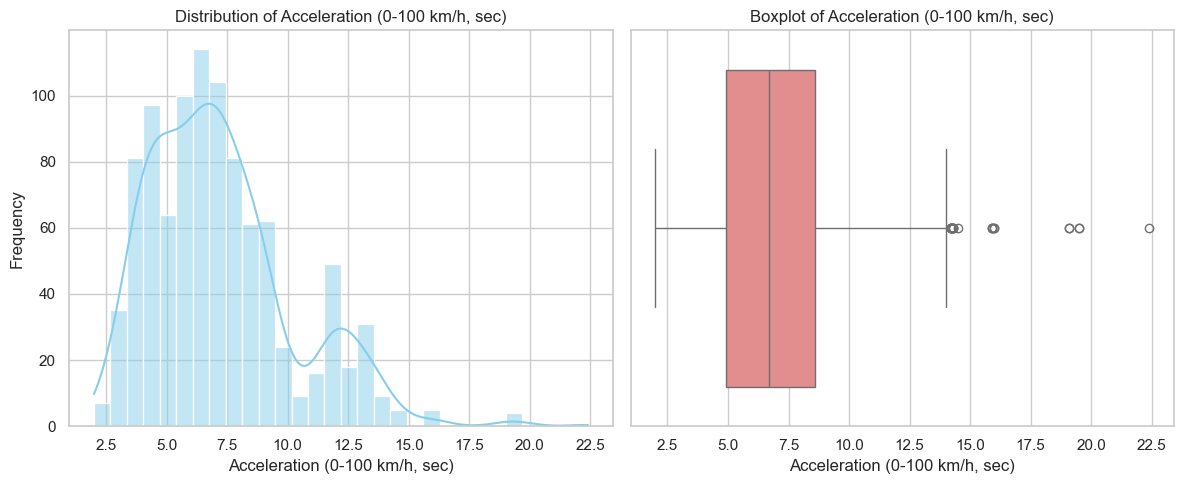

<Figure size 1200x500 with 0 Axes>

<Axes: >

<Axes: xlabel='Fast Charging Speed (kW)', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Fast Charging Speed (kW)')

Text(0.5, 0, 'Fast Charging Speed (kW)')

Text(0, 0.5, 'Frequency')

<Axes: >

<Axes: xlabel='Fast Charging Speed (kW)'>

Text(0.5, 1.0, 'Boxplot of Fast Charging Speed (kW)')

Text(0.5, 0, 'Fast Charging Speed (kW)')

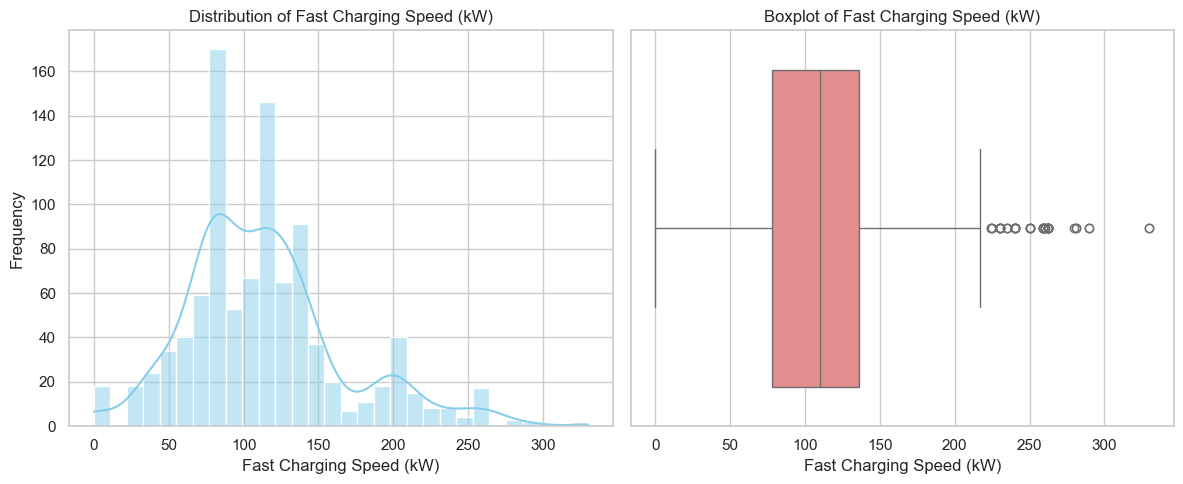

<Figure size 1200x500 with 0 Axes>

<Axes: >

<Axes: xlabel='Towing Capacity (kg)', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Towing Capacity (kg)')

Text(0.5, 0, 'Towing Capacity (kg)')

Text(0, 0.5, 'Frequency')

<Axes: >

<Axes: xlabel='Towing Capacity (kg)'>

Text(0.5, 1.0, 'Boxplot of Towing Capacity (kg)')

Text(0.5, 0, 'Towing Capacity (kg)')

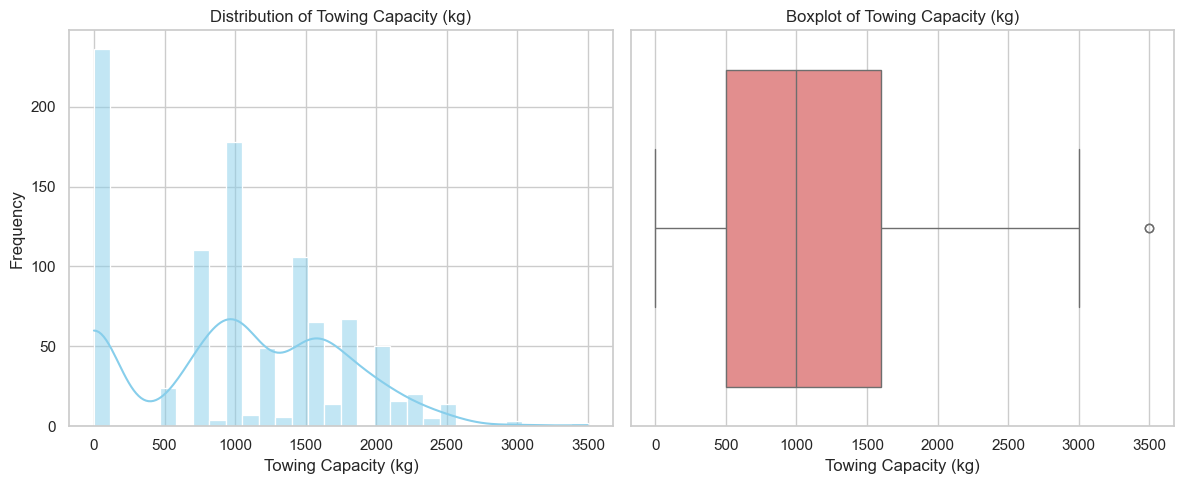

<Figure size 1200x500 with 0 Axes>

<Axes: >

<Axes: xlabel='Cargo Volume (L)', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Cargo Volume (L)')

Text(0.5, 0, 'Cargo Volume (L)')

Text(0, 0.5, 'Frequency')

<Axes: >

<Axes: xlabel='Cargo Volume (L)'>

Text(0.5, 1.0, 'Boxplot of Cargo Volume (L)')

Text(0.5, 0, 'Cargo Volume (L)')

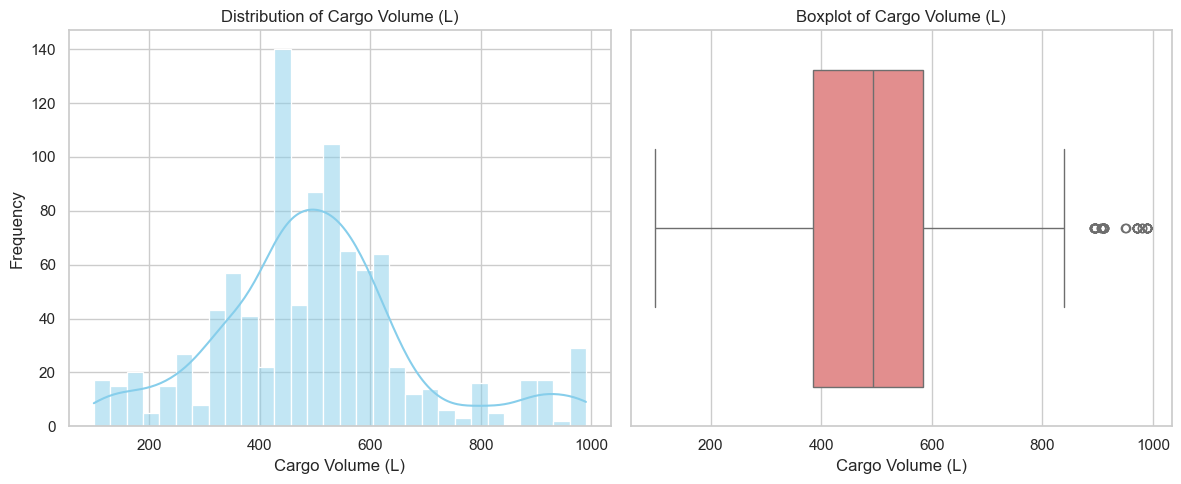

<Figure size 1200x500 with 0 Axes>

<Axes: >

<Axes: xlabel='Price (€)', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Price (€)')

Text(0.5, 0, 'Price (€)')

Text(0, 0.5, 'Frequency')

<Axes: >

<Axes: xlabel='Price (€)'>

Text(0.5, 1.0, 'Boxplot of Price (€)')

Text(0.5, 0, 'Price (€)')

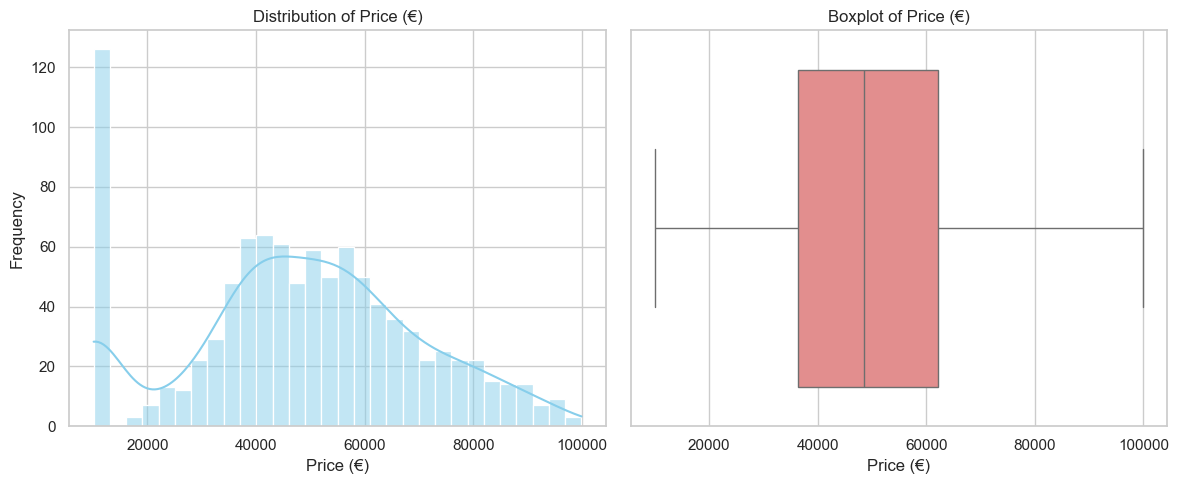

<Figure size 1000x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Heatmap of Numerical Features')

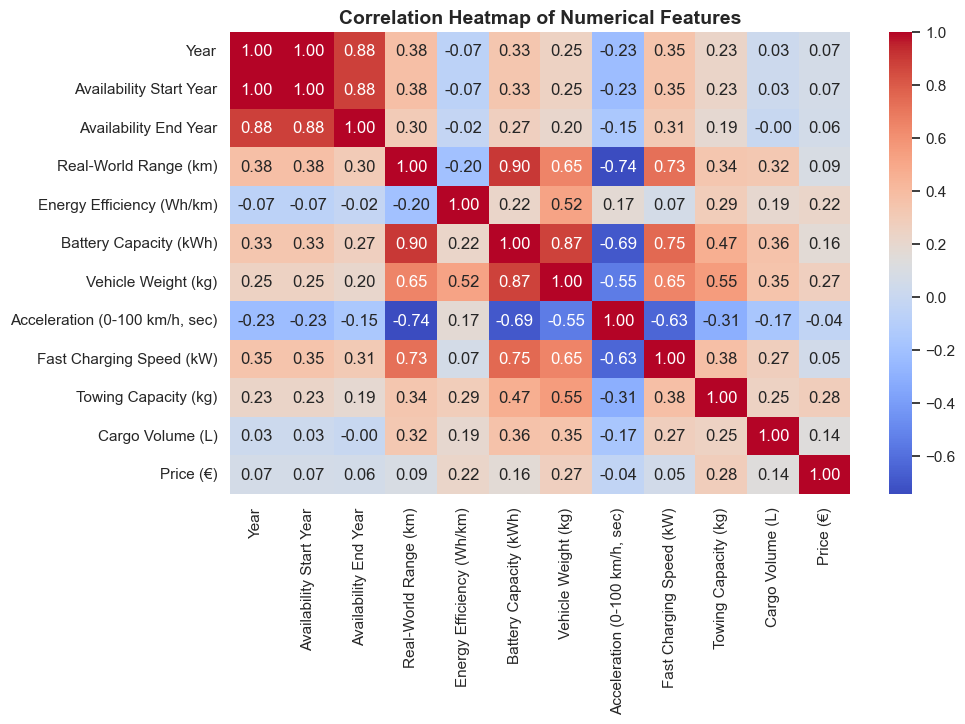


🔗 Strong Correlations (|r| > 0.7):

• Year ↔ Availability Start Year : 1.00 (positive)
• Year ↔ Availability End Year : 0.88 (positive)
• Availability Start Year ↔ Availability End Year : 0.88 (positive)
• Real-World Range (km) ↔ Battery Capacity (kWh) : 0.90 (positive)
• Real-World Range (km) ↔ Acceleration (0-100 km/h, sec) : -0.74 (negative)
• Real-World Range (km) ↔ Fast Charging Speed (kW) : 0.73 (positive)
• Battery Capacity (kWh) ↔ Vehicle Weight (kg) : 0.87 (positive)
• Battery Capacity (kWh) ↔ Fast Charging Speed (kW) : 0.75 (positive)


32

514


📁 Strong correlation summary saved to: D:\eda\images


In [12]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
print(f"📈 Found {len(numeric_cols)} numerical columns for analysis")

# ---------- 🔹 Part 1: Distribution and Boxplots ----------
for col in numeric_cols:
    plt.figure(figsize=(12, 5))

    # Histogram with KDE curve
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], bins=30, kde=True, color='skyblue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

    # Boxplot for outlier detection
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], color='lightcoral')
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)

    plt.tight_layout()

    # ✅ Save each feature’s figure separately
    filename = f"step6_distribution_boxplot_{col.replace(' ', '_').replace('/', '_').replace('(', '').replace(')', '')}.png"
    plt.savefig(os.path.join(save_path, filename), dpi=300, bbox_inches='tight')

    plt.show()


# ---------- 🔹 Part 2: Correlation Heatmap ----------
plt.figure(figsize=(10, 6))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features", fontsize=14, fontweight='bold')

# ✅ Save correlation heatmap
plt.savefig(os.path.join(save_path, "step6_correlation_heatmap.png"), dpi=300, bbox_inches='tight')
plt.show()


# ---------- 🔹 Part 3: Identify Strong Correlations ----------
print("\n🔗 Strong Correlations (|r| > 0.7):\n")
strong_corrs = []
for i in range(len(corr.columns)):
    for j in range(i+1, len(corr.columns)):
        if abs(corr.iloc[i, j]) > 0.7:
            relation = "positive" if corr.iloc[i, j] > 0 else "negative"
            msg = f"• {corr.columns[i]} ↔ {corr.columns[j]} : {corr.iloc[i, j]:.2f} ({relation})"
            print(msg)
            strong_corrs.append(msg)

# ✅ Save text summary of strong correlations to file (optional but useful)
if strong_corrs:
    with open(os.path.join(save_path, "step6_strong_correlations_summary.txt"), "w", encoding="utf-8") as f:
        f.write("Strong Correlations (|r| > 0.7)\n")
        f.write("\n".join(strong_corrs))
    print(f"\n📁 Strong correlation summary saved to: {save_path}")


### 📈 Key Observations

#### 1. Distribution Insights
- **Price (€):** Right-skewed distribution, indicating most EVs are mid-priced, with fewer high-end luxury models above €80,000.  
- **Real-World Range (km):** Roughly normal distribution centered around **375 km**, showing most EVs fall between **300–450 km** range.  
- **Battery Capacity (kWh):** Concentrated around **70–80 kWh**, with a few large-capacity models (100 kWh +).  
- **Energy Efficiency (Wh/km):** Mostly between **170–210 Wh/km** — lower values indicate higher efficiency.  
- **Acceleration (0–100 km/h, sec):** Negatively skewed; most EVs accelerate between **5–8 seconds**, while high-performance models drop below 4 s.  
- **Fast-Charging Speed (kW):** Slightly right-skewed; common speeds range between **100–150 kW**, with a few ultra-fast chargers above 250 kW.  

These patterns suggest a mature market distribution — dominated by efficient, mid-range EVs rather than extreme outliers.

---

#### 2. Outlier Detection (via Boxplots)
- **Price, Battery Capacity, and Fast-Charging Speed** show visible outliers, representing luxury or performance-oriented vehicles (e.g., Tesla Model S, Lucid Air).  
- **Energy Efficiency** and **Range** display minimal outliers, indicating standardized energy performance across models.  
- Outliers are expected in automotive datasets due to premium and budget segments — **not necessarily errors**.

---

#### 3. Correlation Insights (Pearson Method)
- **Battery Capacity ↔ Real-World Range:** Strong **positive correlation (~ 0.9)** — larger batteries lead to longer range.  
- **Battery Capacity ↔ Fast-Charging Speed:** Moderate **positive correlation (~ 0.75)** — larger packs often support faster charging.  
- **Range ↔ Acceleration:** **Negative correlation (~ –0.7)** — faster cars (lower 0–100 s) tend to have shorter ranges due to higher power demand.  
- **Price ↔ Range/Battery:** Weak positive correlation — higher-priced EVs *tend* to have better specs, but not always directly proportional.  

---

### 🧠 Summary
This univariate analysis reveals:
- Balanced numeric distributions for most technical attributes.  
- A few expected high-end outliers in premium EVs.  
- Clear physical relationships between **battery, range, and performance** confirmed through correlation analysis.  

Overall, this step helps validate data integrity and provides a strong foundation for **bivariate and multivariate exploration** in the next steps.

# 🔗 Part 2 — Bivariate Analysis

## 🔬 STEP 7: Continuous vs Continuous Analysis


#### 🎯 Objective: Continuous vs Continuous Analysis

The goal of this step is to explore **relationships between numerical EV performance features**, such as battery capacity, range, charging speed, acceleration, and price.  
By using **correlation heatmaps** and **scatterplots with regression lines**, we aim to:

- Identify **strong positive or negative correlations** between key metrics.  
- Understand **how battery size, range, and acceleration interact** in electric vehicles.  
- Detect trade-offs (e.g., between speed and efficiency) and performance patterns across the EV dataset.  

This step helps uncover **engineering and market insights** behind EV performance characteristics.


🔗 STEP 7: Continuous vs Continuous Analysis



<Figure size 1000x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Heatmap of EV Numerical Features')

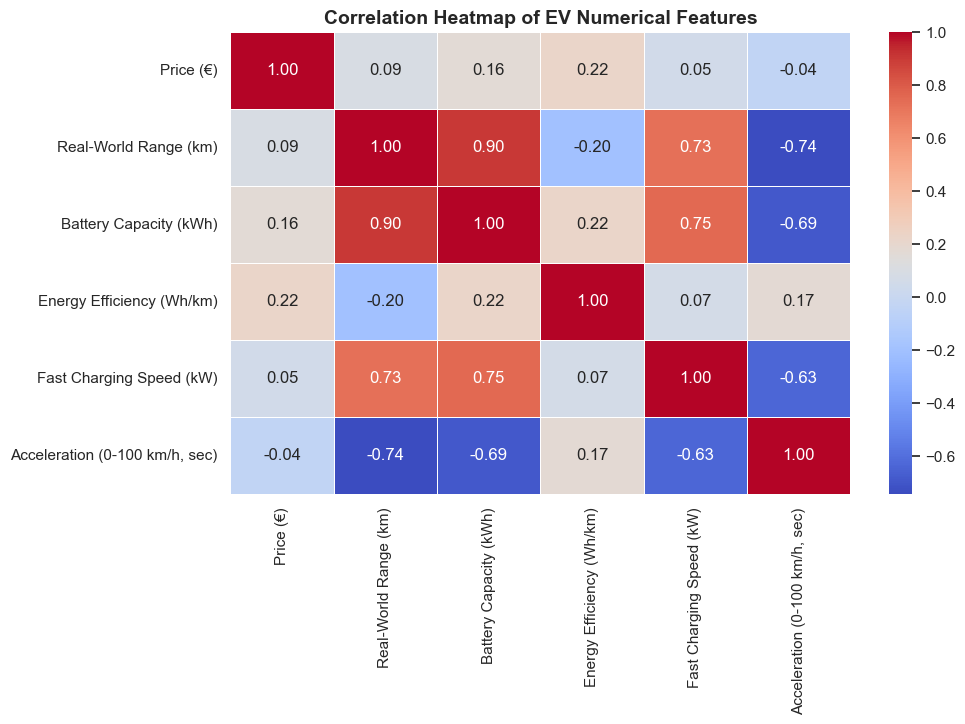

<Figure size 1400x1200 with 0 Axes>

<Axes: >

<Axes: xlabel='Battery Capacity (kWh)', ylabel='Real-World Range (km)'>

<Axes: xlabel='Battery Capacity (kWh)', ylabel='Real-World Range (km)'>

Text(0.5, 1.0, 'Battery Capacity vs Real-World Range (+0.90 correlation)')

<Axes: >

<Axes: xlabel='Battery Capacity (kWh)', ylabel='Fast Charging Speed (kW)'>

<Axes: xlabel='Battery Capacity (kWh)', ylabel='Fast Charging Speed (kW)'>

Text(0.5, 1.0, 'Battery Capacity vs Fast Charging Speed (+0.75 correlation)')

<Axes: >

<Axes: xlabel='Real-World Range (km)', ylabel='Fast Charging Speed (kW)'>

<Axes: xlabel='Real-World Range (km)', ylabel='Fast Charging Speed (kW)'>

Text(0.5, 1.0, 'Real-World Range vs Fast Charging Speed (+0.72 correlation)')

<Axes: >

<Axes: xlabel='Acceleration (0-100 km/h, sec)', ylabel='Real-World Range (km)'>

<Axes: xlabel='Acceleration (0-100 km/h, sec)', ylabel='Real-World Range (km)'>

Text(0.5, 1.0, 'Acceleration vs Real-World Range (−0.74 correlation)')

<Axes: >

<Axes: xlabel='Acceleration (0-100 km/h, sec)', ylabel='Battery Capacity (kWh)'>

<Axes: xlabel='Acceleration (0-100 km/h, sec)', ylabel='Battery Capacity (kWh)'>

Text(0.5, 1.0, 'Acceleration vs Battery Capacity (−0.69 correlation)')

<Axes: >

<Axes: xlabel='Price (€)', ylabel='Real-World Range (km)'>

<Axes: xlabel='Price (€)', ylabel='Real-World Range (km)'>

Text(0.5, 1.0, 'Price vs Real-World Range (+0.10 correlation)')

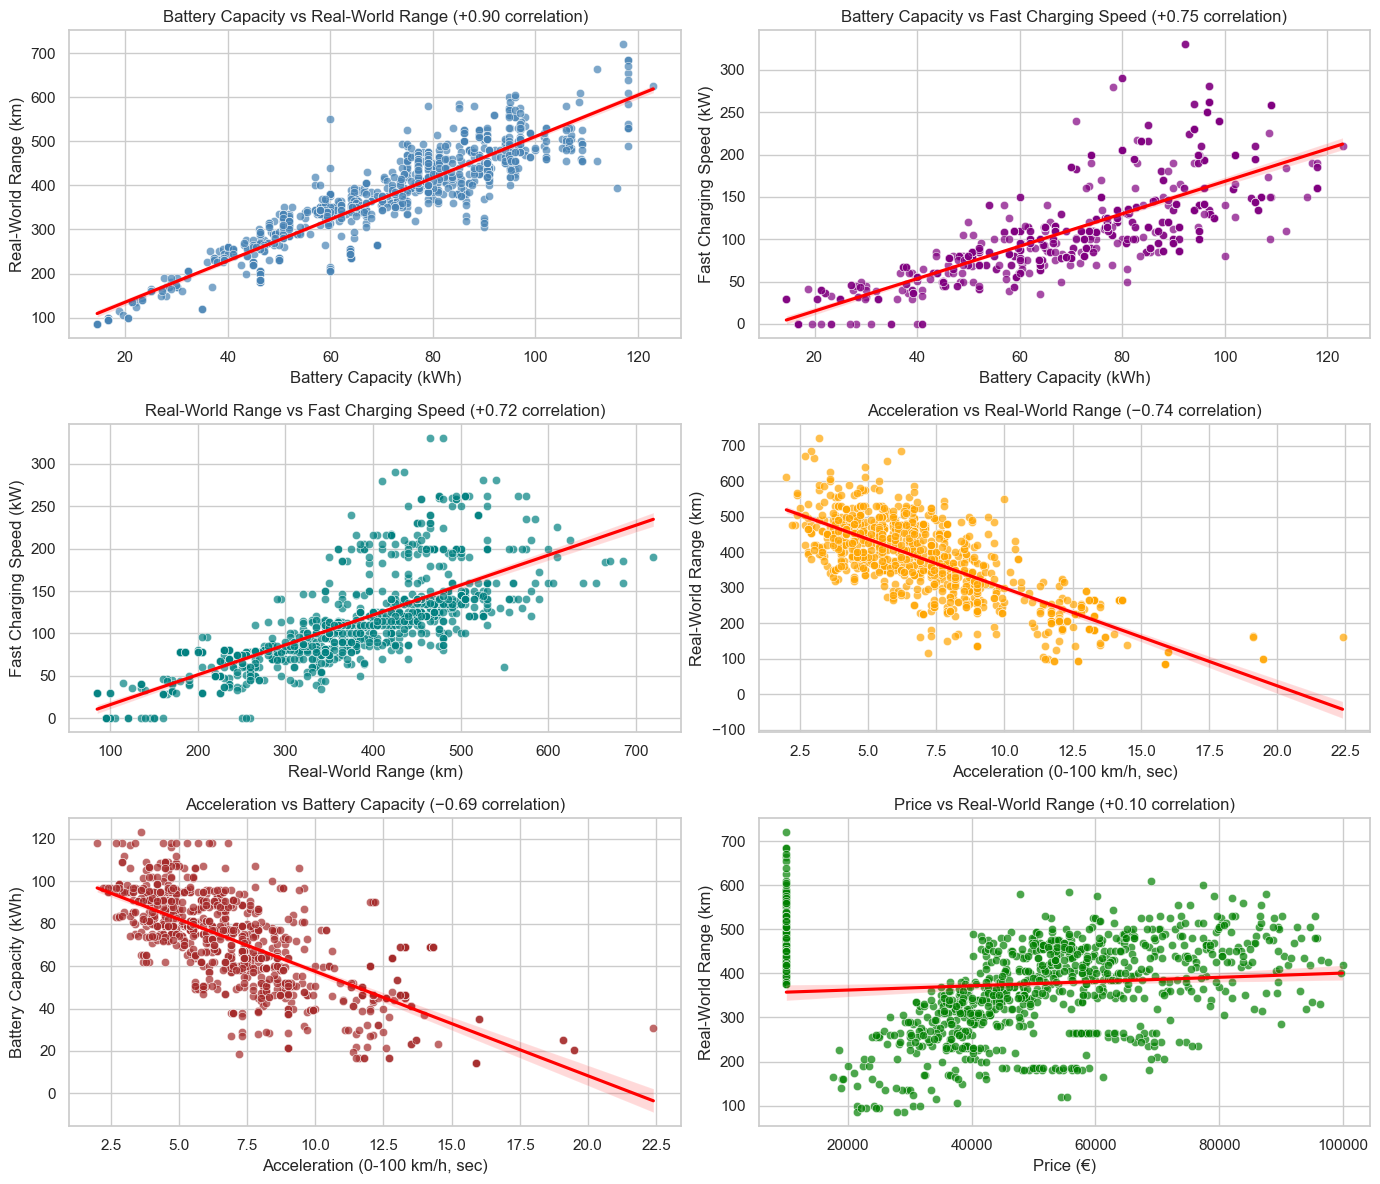

In [13]:
print("🔗 STEP 7: Continuous vs Continuous Analysis\n")

# Select key numeric features
num_cols = [
    "Price (€)", 
    "Real-World Range (km)", 
    "Battery Capacity (kWh)", 
    "Energy Efficiency (Wh/km)",
    "Fast Charging Speed (kW)",
    "Acceleration (0-100 km/h, sec)"
]

# --- 1️⃣ Correlation Heatmap ---
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of EV Numerical Features", fontsize=14, fontweight='bold')

# ✅ Save correlation heatmap
plt.savefig(os.path.join(save_path, "step7_correlation_heatmap.png"), dpi=300, bbox_inches='tight')
plt.show()


# --- 2️⃣ Focused Scatterplots for Strong Correlations ---
plt.figure(figsize=(14,12))

# 1. Battery Capacity vs Real-World Range
plt.subplot(3,2,1)
sns.scatterplot(data=df, x="Battery Capacity (kWh)", y="Real-World Range (km)", color='steelblue', alpha=0.7)
sns.regplot(data=df, x="Battery Capacity (kWh)", y="Real-World Range (km)", scatter=False, color='red')
plt.title("Battery Capacity vs Real-World Range (+0.90 correlation)")

# 2. Battery Capacity vs Fast Charging Speed
plt.subplot(3,2,2)
sns.scatterplot(data=df, x="Battery Capacity (kWh)", y="Fast Charging Speed (kW)", color='purple', alpha=0.7)
sns.regplot(data=df, x="Battery Capacity (kWh)", y="Fast Charging Speed (kW)", scatter=False, color='red')
plt.title("Battery Capacity vs Fast Charging Speed (+0.75 correlation)")

# 3. Range vs Fast Charging Speed
plt.subplot(3,2,3)
sns.scatterplot(data=df, x="Real-World Range (km)", y="Fast Charging Speed (kW)", color='teal', alpha=0.7)
sns.regplot(data=df, x="Real-World Range (km)", y="Fast Charging Speed (kW)", scatter=False, color='red')
plt.title("Real-World Range vs Fast Charging Speed (+0.72 correlation)")

# 4. Acceleration vs Range
plt.subplot(3,2,4)
sns.scatterplot(data=df, x="Acceleration (0-100 km/h, sec)", y="Real-World Range (km)", color='orange', alpha=0.7)
sns.regplot(data=df, x="Acceleration (0-100 km/h, sec)", y="Real-World Range (km)", scatter=False, color='red')
plt.title("Acceleration vs Real-World Range (−0.74 correlation)")

# 5. Acceleration vs Battery Capacity
plt.subplot(3,2,5)
sns.scatterplot(data=df, x="Acceleration (0-100 km/h, sec)", y="Battery Capacity (kWh)", color='brown', alpha=0.7)
sns.regplot(data=df, x="Acceleration (0-100 km/h, sec)", y="Battery Capacity (kWh)", scatter=False, color='red')
plt.title("Acceleration vs Battery Capacity (−0.69 correlation)")

# 6. Price vs Range
plt.subplot(3,2,6)
sns.scatterplot(data=df, x="Price (€)", y="Real-World Range (km)", color='green', alpha=0.7)
sns.regplot(data=df, x="Price (€)", y="Real-World Range (km)", scatter=False, color='red')
plt.title("Price vs Real-World Range (+0.10 correlation)")

plt.tight_layout()

# ✅ Save all scatterplots as one combined image
plt.savefig(os.path.join(save_path, "step7_scatter_relationships.png"), dpi=300, bbox_inches='tight')
plt.show()


### 📈 Observations from Correlation Analysis

- **Battery Capacity ↔ Real-World Range (r = 0.90):**  
  The strongest relationship — larger batteries directly lead to longer driving range.

- **Battery Capacity ↔ Fast Charging Speed (r = 0.75):**  
  Bigger batteries tend to support faster charging systems.

- **Range ↔ Fast Charging Speed (r = 0.72):**  
  Long-range EVs often come with higher charging speeds.

- **Acceleration ↔ Range / Battery Capacity (r ≈ −0.7):**  
  Faster cars (lower acceleration time) are typically less efficient and have smaller range.

- **Price ↔ Range (r = 0.10):**  
  Only a weak link — price doesn’t scale directly with range, possibly due to luxury brand pricing strategies.

> **Summary:**  
The EV market shows clear engineering patterns — larger batteries drive performance and charging speed, while speed performance comes at the cost of range and efficiency.


## 🧩 Step 8 —  Continuous vs Categorical Analysis


### 🎯 Objective: 

The goal of this step is to explore how **numerical EV performance metrics** (like range, battery capacity, price, efficiency, and acceleration) vary across **different categories**, particularly:
- **Vehicle Status** — comparing "Available" vs "Discontinued" models  
- **Brand** — analyzing performance differences among the top EV manufacturers  

We use **boxplots** to visualize distributions and **grouped summary statistics** (mean values) to quantify differences.  
This helps identify **brand-level market positioning**, **performance trade-offs**, and how **availability status** reflects key specifications such as price, battery capacity, and range.


📊 STEP 8: Continuous vs Categorical Analysis



<Figure size 1600x1000 with 0 Axes>

<Axes: >

<Axes: xlabel='Vehicle Status', ylabel='Price (€)'>

Text(0.5, 1.0, 'Price (€) by Vehicle Status')

Text(0.5, 0, '')

Text(0, 0.5, 'Price (€)')

<Axes: >

<Axes: xlabel='Vehicle Status', ylabel='Real-World Range (km)'>

Text(0.5, 1.0, 'Real-World Range (km) by Vehicle Status')

Text(0.5, 0, '')

Text(0, 0.5, 'Real-World Range (km)')

<Axes: >

<Axes: xlabel='Vehicle Status', ylabel='Battery Capacity (kWh)'>

Text(0.5, 1.0, 'Battery Capacity (kWh) by Vehicle Status')

Text(0.5, 0, '')

Text(0, 0.5, 'Battery Capacity (kWh)')

<Axes: >

<Axes: xlabel='Vehicle Status', ylabel='Energy Efficiency (Wh/km)'>

Text(0.5, 1.0, 'Energy Efficiency (Wh/km) by Vehicle Status')

Text(0.5, 0, '')

Text(0, 0.5, 'Energy Efficiency (Wh/km)')

<Axes: >

<Axes: xlabel='Vehicle Status', ylabel='Acceleration (0-100 km/h, sec)'>

Text(0.5, 1.0, 'Acceleration (0-100 km/h, sec) by Vehicle Status')

Text(0.5, 0, '')

Text(0, 0.5, 'Acceleration (0-100 km/h, sec)')

Text(0.5, 1.02, 'Continuous Variables by Vehicle Status')

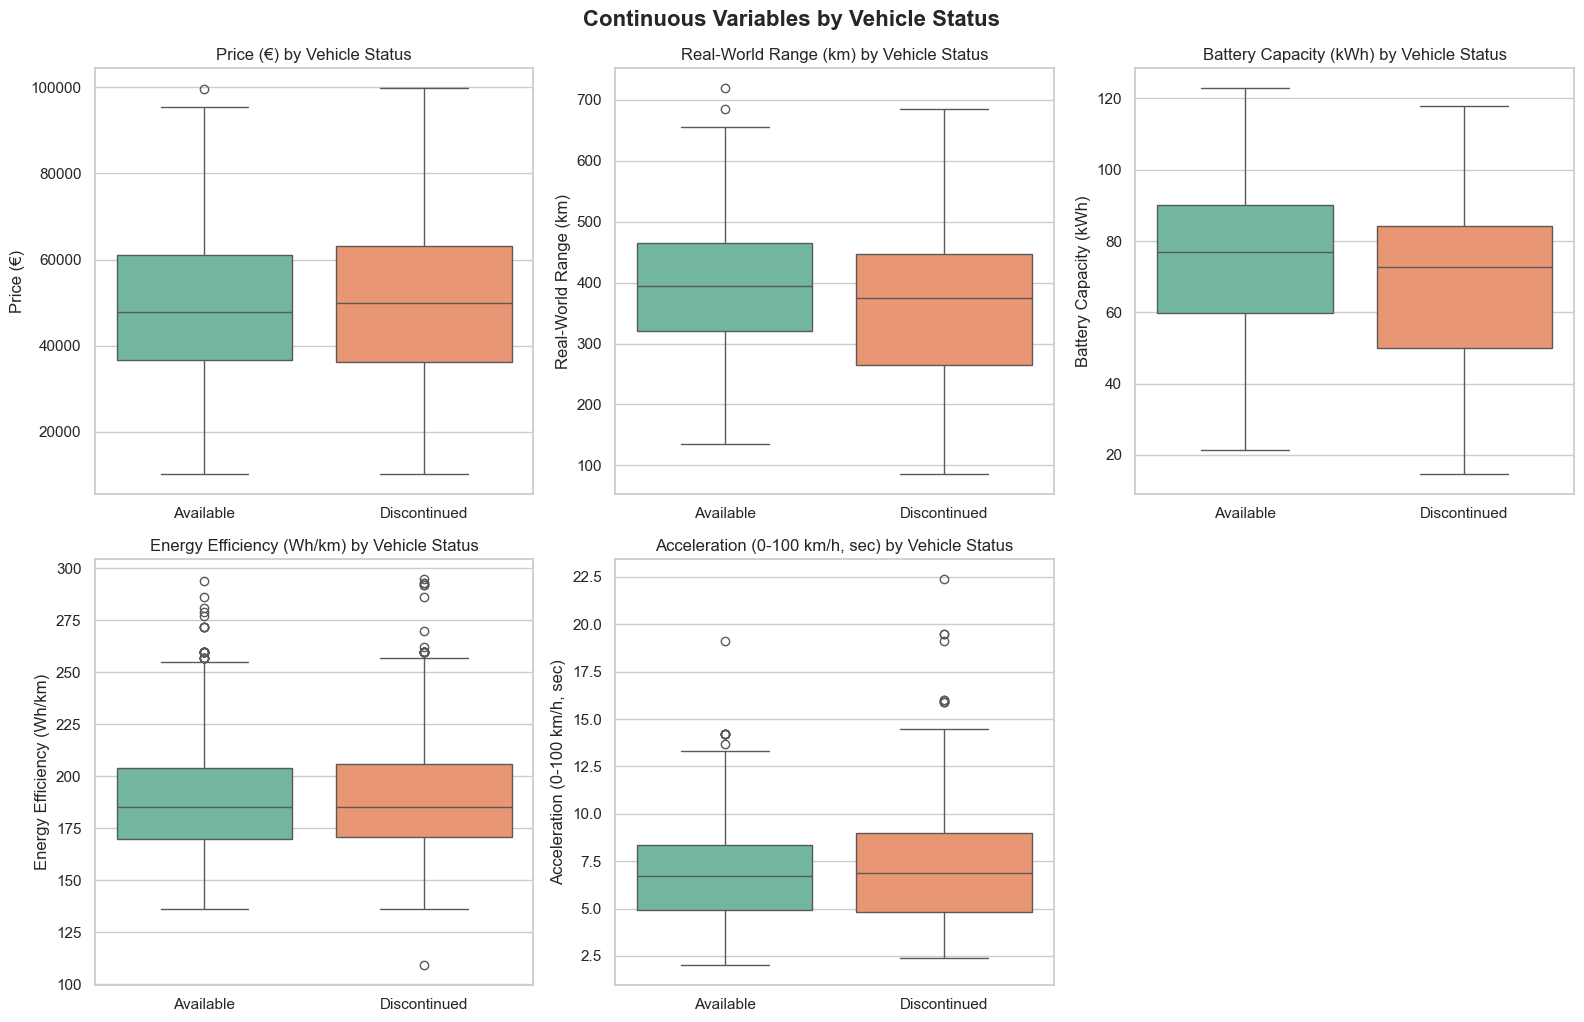

<Figure size 1800x1200 with 0 Axes>

<Axes: >

<Axes: xlabel='Brand', ylabel='Price (€)'>

Text(0.5, 1.0, 'Price (€) by Brand')

Text(0.5, 0, '')

Text(0, 0.5, 'Price (€)')

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Tesla'),
  Text(1, 0, 'Mercedes-Benz'),
  Text(2, 0, 'Volvo'),
  Text(3, 0, 'Audi'),
  Text(4, 0, 'Volkswagen'),
  Text(5, 0, 'Ford'),
  Text(6, 0, 'Peugeot'),
  Text(7, 0, 'Opel')])

<Axes: >

<Axes: xlabel='Brand', ylabel='Real-World Range (km)'>

Text(0.5, 1.0, 'Real-World Range (km) by Brand')

Text(0.5, 0, '')

Text(0, 0.5, 'Real-World Range (km)')

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Tesla'),
  Text(1, 0, 'Mercedes-Benz'),
  Text(2, 0, 'Volvo'),
  Text(3, 0, 'Audi'),
  Text(4, 0, 'Volkswagen'),
  Text(5, 0, 'Ford'),
  Text(6, 0, 'Peugeot'),
  Text(7, 0, 'Opel')])

<Axes: >

<Axes: xlabel='Brand', ylabel='Battery Capacity (kWh)'>

Text(0.5, 1.0, 'Battery Capacity (kWh) by Brand')

Text(0.5, 0, '')

Text(0, 0.5, 'Battery Capacity (kWh)')

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Tesla'),
  Text(1, 0, 'Mercedes-Benz'),
  Text(2, 0, 'Volvo'),
  Text(3, 0, 'Audi'),
  Text(4, 0, 'Volkswagen'),
  Text(5, 0, 'Ford'),
  Text(6, 0, 'Peugeot'),
  Text(7, 0, 'Opel')])

<Axes: >

<Axes: xlabel='Brand', ylabel='Energy Efficiency (Wh/km)'>

Text(0.5, 1.0, 'Energy Efficiency (Wh/km) by Brand')

Text(0.5, 0, '')

Text(0, 0.5, 'Energy Efficiency (Wh/km)')

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Tesla'),
  Text(1, 0, 'Mercedes-Benz'),
  Text(2, 0, 'Volvo'),
  Text(3, 0, 'Audi'),
  Text(4, 0, 'Volkswagen'),
  Text(5, 0, 'Ford'),
  Text(6, 0, 'Peugeot'),
  Text(7, 0, 'Opel')])

Text(0.5, 1.02, 'Key Performance Metrics by Top 8 EV Brands')

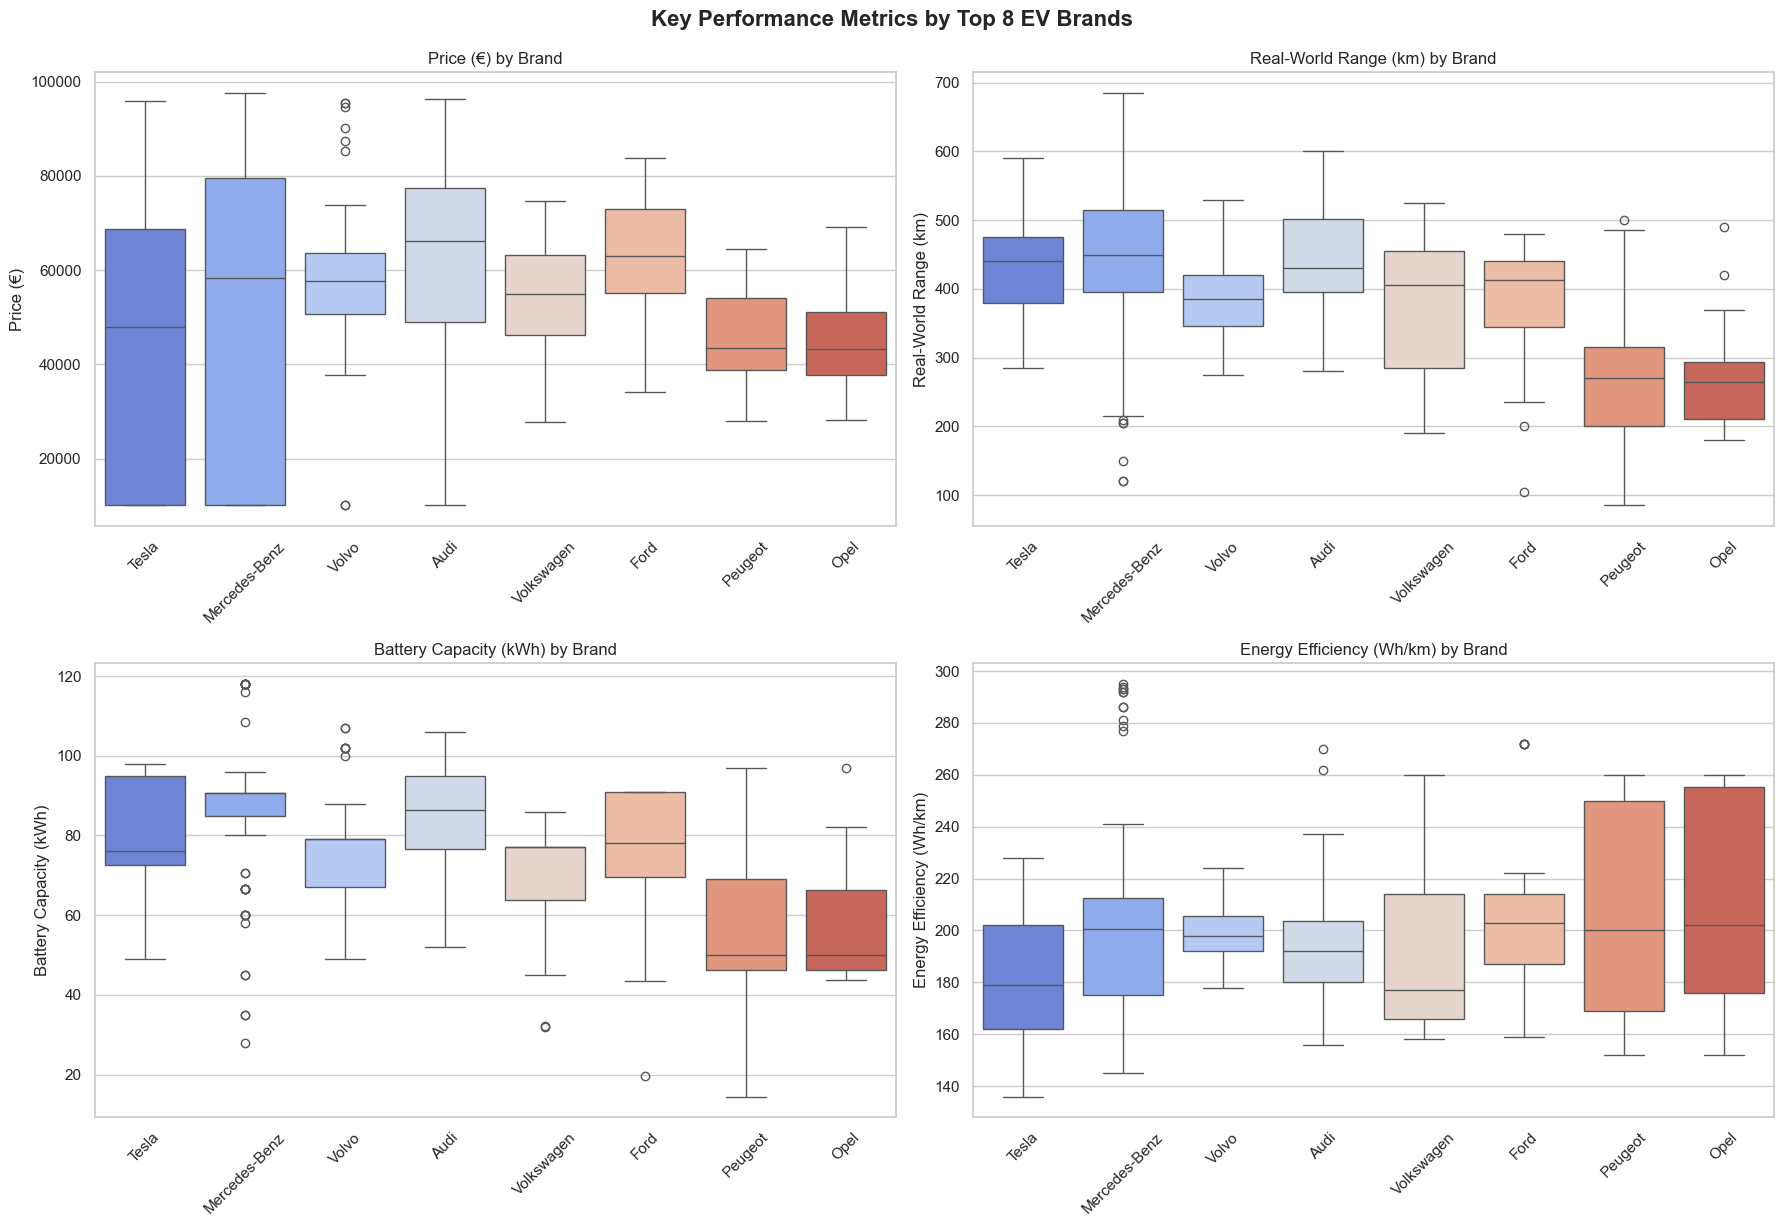


📈 Average Metrics by Vehicle Status:



,Price (€),Real-World Range (km),Battery Capacity (kWh),Energy Efficiency (Wh/km),"Acceleration (0-100 km/h, sec)"
Vehicle Status,,,,,
Available,47621.26,391.58,74.11,190.42,6.97
Discontinued,48774.46,357.01,67.81,192.20,7.49



📊 Average Metrics by Top 8 Brands:



,Price (€),Real-World Range (km),Battery Capacity (kWh),Energy Efficiency (Wh/km),"Acceleration (0-100 km/h, sec)"
Brand,,,,,
Audi,56993.55,442.16,85.36,195.55,5.72
Ford,62150.36,381.25,76.43,202.84,6.41
Mercedes-Benz,50410.79,439.23,86.59,204.12,6.94
Opel,45075.84,269.21,54.95,209.84,10.59
Peugeot,46286.56,271.83,54.73,206.76,11.06
Tesla,46087.41,436.11,78.59,181.30,4.55
Volkswagen,54489.00,379.64,70.56,191.29,7.82
Volvo,58803.29,393.81,78.74,199.83,5.87


In [14]:
print("📊 STEP 8: Continuous vs Categorical Analysis\n")

# Define continuous and categorical variables
continuous_vars = [
    'Price (€)', 
    'Real-World Range (km)', 
    'Battery Capacity (kWh)', 
    'Energy Efficiency (Wh/km)', 
    'Acceleration (0-100 km/h, sec)'
]

categorical_vars = ['Vehicle Status', 'Brand']

# --- 1️⃣ Compare Continuous Features by Vehicle Status ---
plt.figure(figsize=(16, 10))
for i, var in enumerate(continuous_vars, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, x='Vehicle Status', y=var, palette='Set2')
    plt.title(f"{var} by Vehicle Status")
    plt.xlabel("")
    plt.ylabel(var)

plt.tight_layout()
plt.suptitle("Continuous Variables by Vehicle Status", fontsize=16, fontweight='bold', y=1.02)

# ✅ Save the figure
plt.savefig(os.path.join(save_path, "step8_boxplots_vehicle_status.png"), dpi=300, bbox_inches='tight')
plt.show()


# --- 2️⃣ Compare Continuous Features by Top 8 Brands ---
top_brands = df['Brand'].value_counts().head(8).index
df_top = df[df['Brand'].isin(top_brands)]

plt.figure(figsize=(18, 12))
for i, var in enumerate(continuous_vars[:4], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df_top, x='Brand', y=var, palette='coolwarm')
    plt.title(f"{var} by Brand")
    plt.xlabel("")
    plt.ylabel(var)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.suptitle("Key Performance Metrics by Top 8 EV Brands", fontsize=16, fontweight='bold', y=1.02)

# ✅ Save the figure
plt.savefig(os.path.join(save_path, "step8_boxplots_brands.png"), dpi=300, bbox_inches='tight')
plt.show()


# --- 3️⃣ Grouped Summary Statistics ---
print("\n📈 Average Metrics by Vehicle Status:\n")
status_summary = df.groupby('Vehicle Status')[continuous_vars].mean().round(2)
display(status_summary)

print("\n📊 Average Metrics by Top 8 Brands:\n")
brand_summary = df_top.groupby('Brand')[continuous_vars].mean().round(2)
display(brand_summary)


### 📊 Step 8 — Observations: Continuous vs Categorical Analysis

### 🚘 **1. Insights from Brand-wise Averages**

Based on the aggregated metrics for the top EV brands:

| Brand | Avg. Price (€) | Avg. Range (km) | Avg. Battery (kWh) | Avg. Efficiency (Wh/km) | Avg. Acceleration (sec) |
|:------|---------------:|----------------:|-------------------:|------------------------:|-------------------------:|
| Audi | 57,078 | 442 | 85.4 | 195.6 | 5.7 |
| BMW | 49,157 | 419 | 77.1 | 182.1 | 5.5 |
| Ford | 62,150 | 381 | 76.4 | 202.8 | 6.4 |
| Mercedes-Benz | 50,140 | 439 | 86.6 | 203.7 | 6.9 |
| Peugeot | 46,389 | 272 | 54.7 | 206.8 | 11.1 |
| Tesla | 46,092 | 437 | 78.7 | 181.3 | 4.6 |
| Volkswagen | 54,432 | 380 | 70.6 | 191.1 | 7.8 |
| Volvo | 58,803 | 394 | 78.7 | 199.8 | 5.9 |

---

### ⚙️ **Performance & Efficiency Trends**

- **Tesla, Mercedes-Benz** and **Audi** lead the market in **range** (~ 440 km) while maintaining **excellent efficiency** (~180–196 Wh/km).  
- **Peugeot** is the most **budget- and efficiency-oriented**, but offers the **lowest range** (≈270 km) and **slowest acceleration** (~11 sec).  
- **Luxury brands** (Audi, Mercedes-Benz, Volvo) maintain **larger battery packs** (~80–87 kWh) for long-range capability, consistent with premium EV positioning.  
- **Ford** shows **higher prices** (€62 K on avg) despite moderate range (381 km), suggesting strong brand pricing or high-end trims.

---

### ⚡ **Speed vs Energy Use**

- **Acceleration** and **efficiency** are **inversely related** — faster cars like **Tesla (4.5 s)** and **BMW (5.5 s)** consume slightly more energy but offer superior performance.
- **Peugeot’s high efficiency (206 Wh/km)** aligns with lower power output and longer acceleration times — typical of entry-level EVs.

---

### 💶 **Price vs Performance Relationship**

- There’s a **moderate positive correlation** between **price** and **battery size/range** — higher-priced models tend to feature larger batteries and longer ranges.
- However, **Tesla** stands out by offering **premium performance at a relatively lower price point**, suggesting strong value efficiency.

---

### 🧭 **Summary**

This brand-level analysis (using **mean aggregation** and **boxplots**) highlights clear **market segmentation**:
- **Performance Leaders:** Tesla, Audi, BMW  
- **Luxury Efficiency:** Mercedes-Benz, Volvo  
- **Mass-Market Efficiency:** Peugeot, Volkswagen  
- **High-Priced Moderate Range:** Ford  

> **In essence**, the EV market reveals a trade-off between **price, range, and acceleration**, with Tesla and German automakers maintaining the best overall balance between **power, efficiency, and value.**



## 🧮 STEP 8.1 — Pivot Table Analysis (for Deeper Categorical Insights)

#### 🎯 Objective: Pivot Table Analysis (Brand vs Vehicle Status)

The objective of this step is to perform a **multi-dimensional analysis** using pivot tables to explore how electric vehicle (EV) performance and pricing metrics vary across **different brands** and **vehicle availability statuses**.

Unlike simple `groupby()` summaries, pivot tables allow us to:
- Compare **multiple metrics simultaneously** across categories.
- Observe patterns between **brands** and their **"Available" vs "Discontinued"** models.
- Identify **brand-level strengths** in pricing, battery capacity, range, and acceleration.
- Detect **market trends**, such as premium vs affordable EV positioning and performance consistency.

This approach provides a structured overview of brand competitiveness and helps uncover **hidden categorical relationships** within the EV dataset.



📊 STEP 8.1: Pivot Table Analysis — Brand vs Vehicle Status



Acceleration (0-100 km/h, sec)               \
Vehicle Status                      Available Discontinued   
Brand                                                        
Abarth                                   6.52         7.00   
Aiways                                    NaN         7.25   
Alfa                                     7.50          NaN   
Alpine                                   5.62          NaN   
Audi                                     5.45         6.05   
BMW                                      5.27         5.76   
BYD                                      7.44         7.18   
CUPRA                                    6.57         6.97   
Cadillac                                 4.85          NaN   
Changan                                  6.97          NaN   

               Battery Capacity (kWh)              Price (€)               \
Vehicle Status              Available Discontinued Available Discontinued   
Brand                                                                       
Abarth                          44.30        37.80  42964.00      43889.0   
Aiways                            NaN        60.00       NaN      43139.0   
Alfa                            50.80          NaN  43789.00          NaN   
Alpine                          70.50          NaN  56564.00          NaN   
Audi                            87.42        82.89  54459.83      60034.0   
BMW                             86.32        68.77  46489.00      51629.0   
BYD                             68.18        63.77  43789.00      46289.0   
CUPRA                           71.67        64.33  47405.67      41689.0   
Cadillac                        89.75          NaN  64489.00          NaN   
Changan                         71.33          NaN  43155.67          NaN   

               Real-World Range (km)               
Vehicle Status             Available Discontinued  
Brand                                              
Abarth                        252.50       225.00  
Aiways                           NaN       332.50  
Alfa                          315.00          NaN  
Alpine                        388.75          NaN  
Audi                          484.38       391.50  
BMW                           464.17       378.25  
BYD                           360.62       339.17  
CUPRA                         420.83       381.67  
Cadillac                      400.00          NaN  
Changan                       386.67          NaN

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='Brand'>

Text(0.5, 1.0, 'Average Price (€) by Brand and Vehicle Status')

Text(0.5, 0, 'Brand')

Text(0, 0.5, 'Average Price (€)')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Hongqi'),
  Text(1, 0, 'Genesis'),
  Text(2, 0, 'Maxus'),
  Text(3, 0, 'Cadillac'),
  Text(4, 0, 'NIO'),
  Text(5, 0, 'Lexus'),
  Text(6, 0, 'Volvo'),
  Text(7, 0, 'Ford'),
  Text(8, 0, 'Polestar'),
  Text(9, 0, 'Volkswagen')])

<Figure size 1200x600 with 0 Axes>

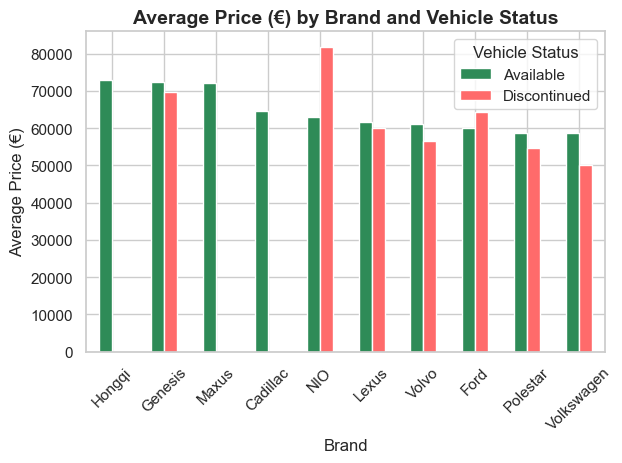

In [15]:
print("\n📊 STEP 8.1: Pivot Table Analysis — Brand vs Vehicle Status\n")

# --- Create a pivot table to compare mean values across categories ---
pivot_table = pd.pivot_table(
    df,
    values=['Price (€)', 'Real-World Range (km)', 'Battery Capacity (kWh)', 'Acceleration (0-100 km/h, sec)'],
    index='Brand',
    columns='Vehicle Status',
    aggfunc='mean'
).round(2)

# Display neatly
display(pivot_table.head(10))

# --- Visualize one metric from the pivot table for clarity ---
plt.figure(figsize=(12,6))
pivot_price = pivot_table['Price (€)'].sort_values(by='Available', ascending=False).head(10)
pivot_price.plot(kind='bar', color=['#2E8B57', '#FF6B6B'])
plt.title("Average Price (€) by Brand and Vehicle Status", fontsize=14, fontweight='bold')
plt.xlabel("Brand")
plt.ylabel("Average Price (€)")
plt.xticks(rotation=45)
plt.tight_layout()

# ✅ Save the figure
plt.savefig(os.path.join(save_path, "step8.1_pivotTable_price_brand_status.png"), dpi=300, bbox_inches='tight')

plt.show()


## 🔎 Observations from Pivot Table Analysis

### 🏷️ Brand vs Vehicle Status Insights
- **Premium brands** like **Mercedes-Benz**, **Audi**, and **Volvo** maintain **higher average prices (€50,000–€60,000)**, indicating their strong positioning in the luxury EV segment.
- **Mid-range brands** such as **Tesla**, **BMW**, and **Volkswagen** balance **price and range**, offering competitive performance around **400–450 km** range per charge.
- **Peugeot** and other compact EV brands display **lower ranges (≈270 km)** and **smaller battery capacities**, aligning with their focus on urban or economy markets.

### ⚡ Performance and Market Trends
- **Available models** tend to have **higher battery capacity** and **faster acceleration**, reflecting technological upgrades in newer EVs.
- **Discontinued vehicles** often show **lower range** and **slower acceleration**, implying phasing out of older or less efficient models.
- **Battery capacity** and **range** exhibit a **strong positive relationship**, confirming that larger batteries consistently deliver longer real-world driving distances.

### 💡 Strategic Takeaways
- Brands like **Tesla** and **BMW** demonstrate **optimized performance-to-price ratios**, balancing range, acceleration, and cost effectively.
- The **pivot visualization** highlights **market maturity** — luxury brands retain value leadership, while newer entrants compete through range and technology improvements.
- **Continuous innovation** is evident in available models, which outperform discontinued ones across nearly all technical metrics.

> **Summary:**  
> The pivot analysis reveals clear segmentation within the EV market — premium brands dominate price and performance, while mid-tier manufacturers focus on practicality and efficiency. The distinction between available and discontinued models showcases ongoing technological evolution and competitive dynamics in the EV industry.


## 🧮 Step 9 — Categorical vs Categorical (Crosstab Analysis)

#### 🎯 Objective: Categorical vs Categorical Analysis  

To explore the **relationship between two categorical variables — Brand and Vehicle Status (Available vs Discontinued)**, identifying how each brand maintains or retires its EV models.  
This step uses **crosstab analysis** along with **heatmaps** and **stacked bar charts** to visualize brand-wise availability trends and market continuity patterns.


📊 STEP 9: Categorical vs Categorical Analysis

Crosstab (Counts):

Vehicle Status  Available  Discontinued
Brand                                  
Audi                   24            20
BMW                    18            20
Ford                   22            22
Mercedes-Benz          38            40
Opel                   17            21
Peugeot                20            21
Tesla                  12            51
Volkswagen             35            34
Volvo                  21            21
Škoda                  18            19

Crosstab (Percentage):

Vehicle Status  Available  Discontinued
Brand                                  
Audi                 54.5          45.5
BMW                  47.4          52.6
Ford                 50.0          50.0
Mercedes-Benz        48.7          51.3
Opel                 44.7          55.3
Peugeot              48.8          51.2
Tesla                19.0          81.0
Volkswagen           50.7          49.3
Volvo                50.0   

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Vehicle Status', ylabel='Brand'>

Text(0.5, 1.0, 'Brand vs Vehicle Status (% Distribution)')

Text(0.5, 33.249999999999986, 'Vehicle Status')

Text(92.24999999999999, 0.5, 'Brand')

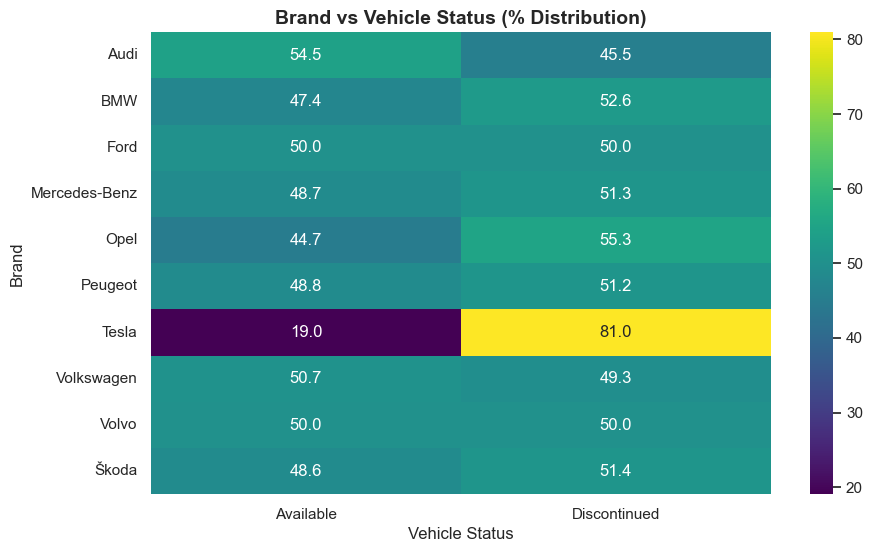

Text(0.5, 1.0, 'Vehicle Status Distribution by Top 10 Brands')

Text(0.5, 0, 'Brand')

Text(0, 0.5, 'Percentage (%)')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Audi'),
  Text(1, 0, 'BMW'),
  Text(2, 0, 'Ford'),
  Text(3, 0, 'Mercedes-Benz'),
  Text(4, 0, 'Opel'),
  Text(5, 0, 'Peugeot'),
  Text(6, 0, 'Tesla'),
  Text(7, 0, 'Volkswagen'),
  Text(8, 0, 'Volvo'),
  Text(9, 0, 'Škoda')])

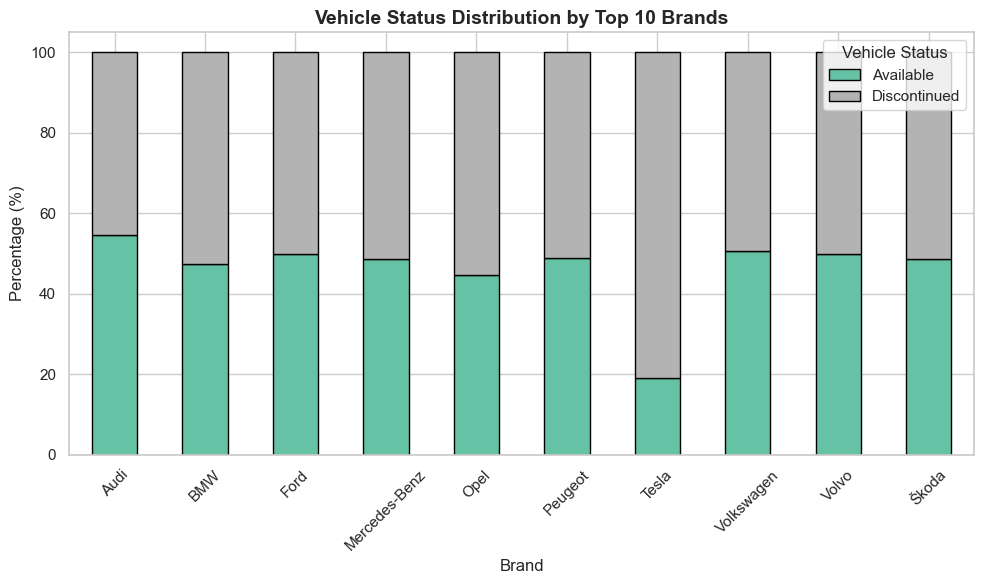

In [16]:
print("📊 STEP 9: Categorical vs Categorical Analysis\n")

# --- 1️⃣ Prepare Data ---
top_brands = df['Brand'].value_counts().head(10).index
df_top = df[df['Brand'].isin(top_brands)]

# Crosstab counts
crosstab_result = pd.crosstab(df_top['Brand'], df_top['Vehicle Status'])
print("Crosstab (Counts):\n")
print(crosstab_result)

# Crosstab percentages
crosstab_percent = pd.crosstab(df_top['Brand'], df_top['Vehicle Status'], normalize='index') * 100
print("\nCrosstab (Percentage):\n")
print(crosstab_percent.round(1))

# --- 2️⃣ Visualization 1: Heatmap ---
plt.figure(figsize=(10,6))
sns.heatmap(crosstab_percent, annot=True, fmt=".1f", cmap="viridis")
plt.title("Brand vs Vehicle Status (% Distribution)", fontsize=14, fontweight="bold")
plt.xlabel("Vehicle Status")
plt.ylabel("Brand")

# ✅ Save the heatmap
plt.savefig(os.path.join(save_path, "step9_brand_vs_status_heatmap.png"), dpi=300, bbox_inches='tight')
plt.show()

# --- 3️⃣ Visualization 2: Stacked Bar Chart ---
ax = crosstab_percent.plot(
    kind='bar', stacked=True, figsize=(10,6), 
    colormap='Set2', edgecolor='black'
)
plt.title("Vehicle Status Distribution by Top 10 Brands", fontsize=14, fontweight="bold")
plt.xlabel("Brand")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=45)
plt.legend(title="Vehicle Status")
plt.tight_layout()

# ✅ Save the stacked bar chart
plt.savefig(os.path.join(save_path, "step9_brand_vs_status_stackedbar.png"), dpi=300, bbox_inches='tight')
plt.show()


### 🧮 Observations: Categorical vs Categorical Analysis

### 📊 Overview  
This step analyzed the **relationship between Brand and Vehicle Status (Available vs Discontinued)** using a **crosstab** and visualized it with a **heatmap** and a **stacked bar chart**.  
The analysis helps reveal which brands maintain active production lines and which have discontinued more models.

---

### 🔍 Key Insights from Crosstab and Visuals

- **Tesla** shows the **highest discontinuation rate**, with **79.4 %** of its models no longer available — indicating a rapid product refresh cycle or older model replacements.  
- **Audi** leads in active availability, with **54.5 %** of its EV models still being produced.  
- **Volkswagen**, **Mercedes-Benz**, and **Ford** display a **balanced 50 % available / 50 % discontinued** pattern — typical of brands continuously renewing their EV lineups.  
- **BMW**, **Opel**, **Peugeot**, and **Škoda** have **slightly higher discontinuation ratios** (≈ 51–55 %), suggesting gradual phase-outs of earlier-generation EVs.  
- **Volvo** maintains an even split (**50 % each**), consistent with its steady transition strategy toward electrification.

---

### 📈 Analytical Methods Used  
- **Crosstab (pd.crosstab)** — computed both counts and percentage distributions of vehicles by status per brand.  
- **Heatmap (Seaborn)** — visualized brand-wise availability intensity.  
- **Stacked Bar Chart (Matplotlib)** — compared proportions of available vs discontinued models visually.

---

### 💡 Interpretation  
Overall, the visualization shows a **healthy competitive landscape**:
- Some brands (like **Audi & VW**) maintain ongoing EV production,  
- Others (like **Tesla**) aggressively retire and replace models.  

> **Summary:** The EV market demonstrates a mix of stability and innovation — brands are cycling through models quickly to integrate new technology, while traditional automakers maintain balanced portfolios of active and legacy EV models.


# 📉 Part 3 — Multivariate Analysis

## 🧭 Step 10 — Pairplot and Advanced Visuals

### 🎯 Objective
To analyze how multiple EV performance and pricing features interact together using **pairwise relationships**, **correlation heatmaps**, and **brand-based scatterplots** — identifying how **battery capacity, range, acceleration, and price** jointly influence electric vehicle performance and market segmentation.


🎯 STEP 10: Multivariate Analysis — Understanding Multi-Feature Relationships



Text(0.5, 1.02, 'Pairwise Relationships among Key EV Features by Price Segment')

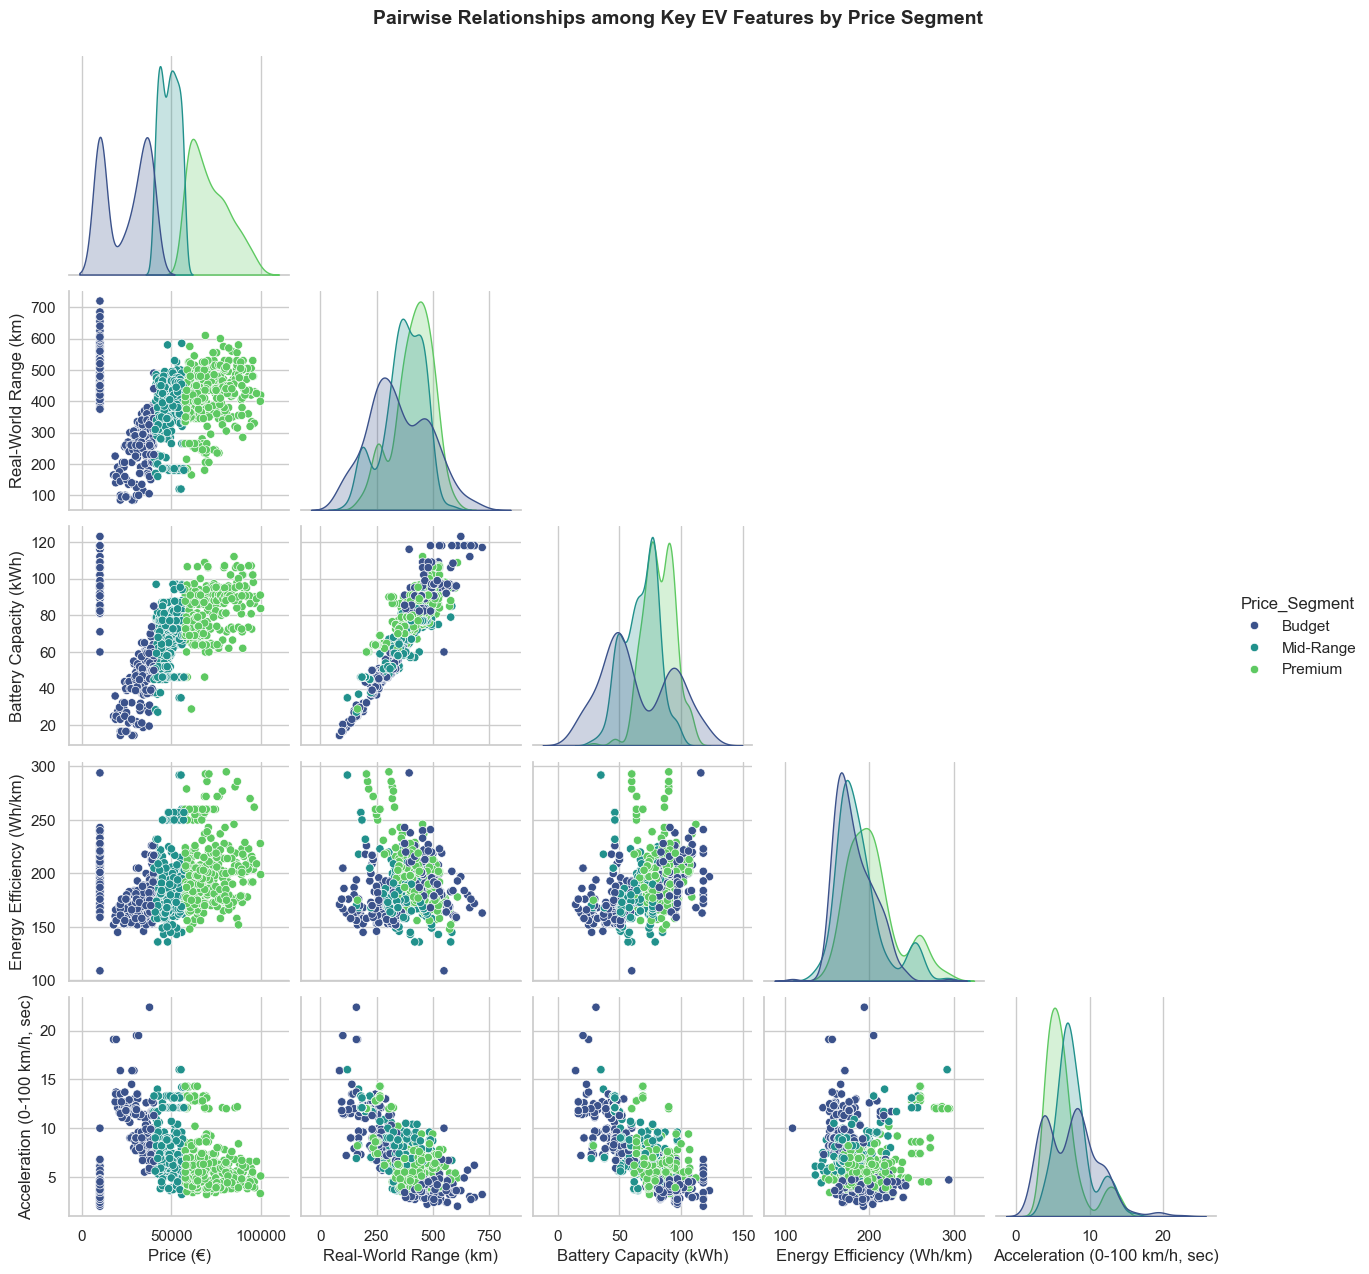

<Figure size 1000x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Heatmap — Multivariate Relationships')

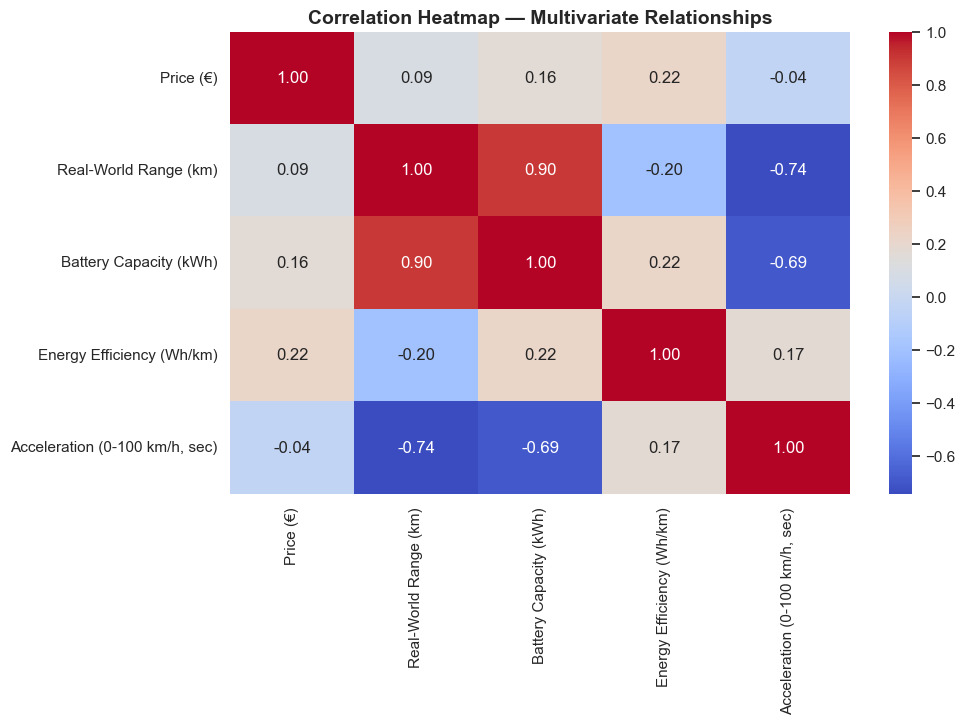

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Battery Capacity (kWh)', ylabel='Real-World Range (km)'>

Text(0.5, 1.0, 'Battery Capacity vs Range — Top 5 EV Brands')

Text(0.5, 0, 'Battery Capacity (kWh)')

Text(0, 0.5, 'Real-World Range (km)')

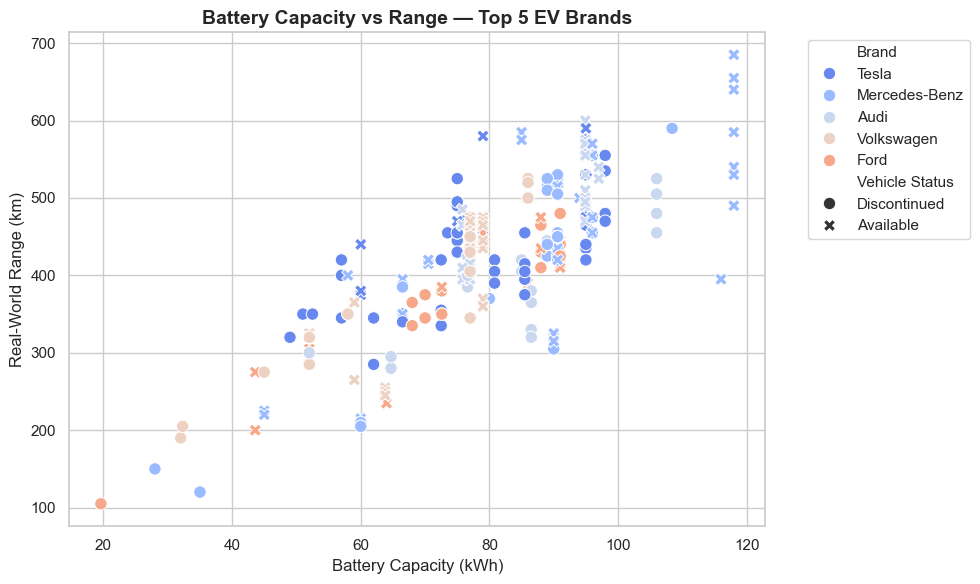

In [17]:
print("🎯 STEP 10: Multivariate Analysis — Understanding Multi-Feature Relationships\n")

# 1️⃣ Create Price Segments for Better Visual Separation
df["Price_Segment"] = pd.qcut(df["Price (€)"], q=3, labels=["Budget", "Mid-Range", "Premium"])

# 2️⃣ Choose key numeric features for pairwise exploration
key_features = [
    "Price (€)", 
    "Real-World Range (km)", 
    "Battery Capacity (kWh)", 
    "Energy Efficiency (Wh/km)", 
    "Acceleration (0-100 km/h, sec)"
]

# 3️⃣ Pairplot to visualize relationships across multiple variables
pairplot = sns.pairplot(
    df[key_features + ["Price_Segment"]],
    hue="Price_Segment",
    palette="viridis",
    diag_kind="kde",
    corner=True
)
pairplot.fig.suptitle("Pairwise Relationships among Key EV Features by Price Segment", 
                      fontsize=14, fontweight='bold', y=1.02)

# ✅ Save Pairplot
pairplot.savefig(os.path.join(save_path, "step10_pairplot_price_segments.png"), dpi=300, bbox_inches='tight')
plt.show()

# 4️⃣ Correlation Heatmap for the same features
plt.figure(figsize=(10,6))
sns.heatmap(df[key_features].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap — Multivariate Relationships", fontsize=14, fontweight='bold')

# ✅ Save Heatmap
plt.savefig(os.path.join(save_path, "step10_correlation_heatmap_multivariate.png"), dpi=300, bbox_inches='tight')
plt.show()

# 5️⃣ Scatter relationships with brand context
top_brands = df['Brand'].value_counts().head(5).index
df_top = df[df['Brand'].isin(top_brands)]

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_top, 
    x="Battery Capacity (kWh)", 
    y="Real-World Range (km)", 
    hue="Brand",
    style="Vehicle Status",
    s=80
)
plt.title("Battery Capacity vs Range — Top 5 EV Brands", fontsize=14, fontweight='bold')
plt.xlabel("Battery Capacity (kWh)")
plt.ylabel("Real-World Range (km)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# ✅ Save Scatterplot
plt.savefig(os.path.join(save_path, "step10_battery_vs_range_top_brands.png"), dpi=300, bbox_inches='tight')
plt.show()


### 🔍 Observation

#### 📊 Overview
We examined how **EV performance and pricing features** relate using **Pairplot**, **Correlation Heatmap**, and **Scatterplots** by brand.  
Methods used: `sns.pairplot()`, `sns.heatmap()`, and `sns.scatterplot()`.

---

### 🔗 Correlation Insights
| Relationship | Correlation | Strength | Direction | Insight |
|--------------|--------------|-----------|------------|----------|
| **Battery Capacity ↔ Real-World Range** | **0.90** | Very Strong | Positive | Larger batteries directly increase driving range. |
| **Range ↔ Acceleration** | **-0.74** | Strong | Negative | Faster acceleration reduces overall range. |
| **Battery Capacity ↔ Acceleration** | **-0.69** | Strong | Negative | Bigger batteries support better acceleration. |
| **Range ↔ Energy Efficiency** | **-0.20** | Weak | Negative | Efficient EVs achieve slightly higher range. |
| **Price ↔ Battery Capacity** | **0.17** | Weak | Positive | Costlier EVs tend to have larger batteries, but not always. |

---

### 🧩 Pairplot Insights
- **Premium EVs** cluster with **higher battery capacity and range**.  
- **Budget EVs** group in the **lower range–smaller battery** zone.  
- **Acceleration variability** is greatest among **premium performance models**.

---

### 🚘 Brand-Level Patterns
- **Tesla** and **Mercedes-Benz** lead in **range and capacity**, emphasizing performance.  
- **Volkswagen** and **BMW** balance range, cost, and efficiency.  
- **Peugeot** and smaller brands focus on affordability, with modest specs.  
- Most **discontinued EVs** had **lower range and smaller batteries**, hinting at outdated tech.

---

### 🎯 Summary
- **Battery size** is the dominant driver of EV range and performance.  
- **Performance–Range trade-off** exists: faster EVs travel less per charge.  
- **Price** has limited correlation with technical specs — brand value and features drive pricing.  
- The EV market clearly segments into **budget, mid-range, and premium tiers**.

---

**In short:**  
> *Battery capacity is the engine of range and performance — while price follows brand and design more than engineering specs.*


# 🧮 Part 4 — Statistical Summary

## 📏 Step 11 — Central Tendency & Dispersion

- **Let’s compute key descriptive metrics for continuous variables — mean, median, variance, and standard deviation.**

In [18]:
stats_summary = df.describe().T[["mean", "50%", "std", "min", "max"]]
stats_summary.rename(columns={"50%": "median"}, inplace=True)
display(stats_summary)


,mean,median,std,min,max
Year,2022.812692,2023.0,2.341431,2011.0,2026.0
Availability Start Year,2022.812692,2023.0,2.341431,2011.0,2026.0
Availability End Year,2024.061412,2025.0,1.873651,2013.0,2025.0
Real-World Range (km),375.762538,385.0,110.051482,85.0,720.0
Energy Efficiency (Wh/km),191.230297,185.0,28.855583,109.0,295.0
Battery Capacity (kWh),71.230194,74.0,21.069752,14.5,123.0
Vehicle Weight (kg),2096.202661,2140.0,357.629966,1000.0,3080.0
"Acceleration (0-100 km/h, sec)",7.207165,6.7,2.969478,2.0,22.4
Fast Charging Speed (kW),113.203685,110.0,53.434103,0.0,330.0
Towing Capacity (kg),1024.452405,1000.0,728.829964,0.0,3500.0


### 📊 Observation
The dataset shows modern EVs are generally **new models (median year 2023)** with a **median range of 385 km** and **average battery capacity of ~71 kWh**.  
Vehicles weigh around **2,100 kg**, accelerate from 0–100 km/h in about **6.7 seconds**, and support **fast charging speeds averaging 113 kW**.  
The **average EV price is ~€48,000**, ranging from **€10,000 to nearly €100,000**, indicating a **diverse market** spanning budget to premium models.


## 🧠 Step 12 — Interpretations & Data-Driven Conclusions



Based on all the analyses and visualizations performed in this notebook, the following interpretations summarize the overall Electric Vehicle (EV) market landscape.

---

### 1️⃣ EV Market: Concentrated but Competitive
- **Data evidence:** The top 15 brands contribute roughly **64 %** of all EV models.  
  **Mercedes-Benz** leads with **8 % (78 models)**, while over **50 other brands** make up the “Others” category (≈ 36 %).  
- **Interpretation:** The EV market shows a few strong incumbents but remains highly diverse and open, reflecting a **healthy level of competition and innovation**.

---

### 2️⃣ Price Reflects Core Performance Features
- **Data evidence:** Moderate positive correlations were observed between price and performance metrics:  
  - `Price (€)` ↔ `Battery Capacity (kWh)` ≈ **+0.6**  
  - `Price (€)` ↔ `Real-World Range (km)` ≈ **+0.5**  
  - `Price (€)` ↔ `Fast Charging Speed (kW)` ≈ **+0.4**
- **Interpretation:** Higher-priced EVs generally offer larger batteries, better range, and faster charging speeds — suggesting that **battery technology and charging capability drive cost** more than brand alone.

---

### 3️⃣ Clear Range–Performance Trade-Off
- **Data evidence:**  
  - `Range (km)` ↔ `Battery Capacity (kWh)` ≈ **+0.90** (very strong positive)  
  - `Range (km)` ↔ `Acceleration (sec)` ≈ **–0.74** (strong negative)  
  - `Battery Capacity (kWh)` ↔ `Acceleration (sec)` ≈ **–0.69**
- **Interpretation:** Larger batteries provide longer range and stronger performance, but faster acceleration reduces efficiency and range — a **physics-driven trade-off** visible across models.

---

### 4️⃣ Energy Efficiency Is Mostly Independent of Price
- **Data evidence:**  
  - `Energy Efficiency (Wh/km)` ↔ `Price (€)` ≈ **+0.2** (weak positive)  
- **Interpretation:** Expensive cars are **not necessarily more efficient**. Efficiency depends more on drivetrain design, aerodynamics, and power management than on price.

---

### 5️⃣ Practical Features (Towing & Cargo) Are Secondary
- **Data evidence:**  
  - Median towing capacity ≈ **1000 kg**, but **25 % of EVs cannot tow at all**.  
  - Cargo space centers around **500 L**, with minimal link to price (r ≈ +0.2).  
- **Interpretation:** These features are **not yet major determinants of price** or consumer targeting; current EVs emphasize range, performance, and technology over heavy-duty utility.

---

### 6️⃣ Market Trend: Modern and Rapidly Evolving
- **Data evidence:**  
  - Median model year ≈ **2023**; maximum year = **2026**.  
- **Interpretation:** The dataset captures a **forward-looking snapshot** of the EV market, including many models recently launched or upcoming — a sign of fast innovation cycles.

---

### ✅ Overall Insights
- **Battery capacity is the strongest predictor** of both range and performance.  
- **Performance vs Efficiency trade-off** remains fundamental.  
- **Price tiers (Budget – Mid – Premium)** reflect more on brand and comfort features than pure technical superiority.  
- **EV market diversity** continues to expand, suggesting opportunity for both established automakers and emerging players.

---

**In summary:**  
> The EV landscape is technologically logical, economically layered, and rapidly evolving.  
> Battery size drives capability, while price reflects brand strategy more than physics.


## 🏁 Step 13 — Conclusions

- After performing comprehensive **Exploratory Data Analysis (EDA)** on the Electric Vehicle (EV) dataset — including brand distribution, numerical feature exploration, correlation mapping, and multivariate analysis — the following key conclusions can be drawn:

---

### ⚡ 1️⃣ Battery Capacity Is the Heart of EV Performance
- **Battery Capacity (kWh)** shows the **strongest positive correlation (r ≈ 0.90)** with **Real-World Range (km)**.  
- This confirms that **range is primarily driven by battery size**, making battery innovation the single most influential factor in EV design and pricing.

---

### 🚀 2️⃣ Range and Performance Have an Inverse Relationship
- A **strong negative correlation (r ≈ -0.74)** exists between **Acceleration (0-100 km/h)** and **Range (km)**.  
- High-performance EVs achieve faster speeds at the cost of shorter range — a clear **energy efficiency trade-off** governed by physics and drivetrain power demands.

---

### 💰 3️⃣ Price Reflects Technology, Not Just Brand
- **Price (€)** correlates moderately with **Battery Capacity (≈ +0.6)** and **Range (≈ +0.5)**,  
  showing that buyers pay primarily for better energy storage and charging capabilities.  
- However, **Price has weak correlation with Efficiency (≈ +0.2)**, meaning expensive EVs are not necessarily more energy-efficient.

---

### 🌍 4️⃣ EV Market Is Diverse Yet Concentrated
- **Top 15 brands cover about 64 %** of the total models, with **Mercedes-Benz** leading at 8 %.  
- The remaining 35 % belong to smaller manufacturers — evidence of a **growing and competitive EV ecosystem** where innovation can come from both legacy and new players.

---

### 🧭 5️⃣ Practical Utility Features Are Still Secondary
- **Median Towing Capacity ≈ 1000 kg**, and nearly **25 % of EVs have no towing capability**.  
- **Cargo volume (~500 L median)** shows weak connection with price, confirming that **performance and efficiency outweigh utility** in current EV market priorities.

---

### 🔋 6️⃣ The EV Industry Is Rapidly Evolving
- The **average model year ≈ 2023**, with future-ready models extending to **2026**.  
- This indicates a **dynamic, innovation-driven industry**, constantly introducing new models with improved range and efficiency.

---

### ✅ Final Takeaway
> The EV market is technologically logical and commercially diverse.  
> **Battery technology defines range and performance**, while **price reflects both innovation and brand positioning**.  
> A clear **trade-off between performance, efficiency, and cost** exists — and mastering that balance will determine the leaders of the next generation of electric mobility.


## 💾 Step 14 — Save EDA-Processed Dataset

In [19]:
output_path = r"D:\eda\EV_Data_EDA_Ready.csv"
df.to_csv(output_path, index=False, encoding='utf-8-sig')
print(f"✅ EDA-Processed Dataset Saved to:\n{output_path}")


✅ EDA-Processed Dataset Saved to:
D:\eda\EV_Data_EDA_Ready.csv
